In [1]:
# project uses the caltech101 dataset found here https://data.caltech.edu/records/mzrjq-6wc02

%pip install tensorflow
%pip install keras
%pip install matplotlib
%pip install tensorflow_datasets
%pip install numpy
%pip install seaborn
%pip install scikit-learn

import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


### Le'ts inspect the data

In [2]:
train_data, val_data, test_data = tfds.load('caltech101', split=['train[:80%]', 'train[80%:]', 'test'], shuffle_files=True, as_supervised=True)

print(f"Training set size: {len(list(train_data))}")
print(f"Validation set size: {len(list(val_data))}")
print(f"Test set size: {len(list(test_data))}")

for image, label in train_data.take(1):
    print(f"Image shape: {image.shape}")
    print(f"Label: {label.numpy()}")

info = tfds.builder('caltech101').info
class_names = info.features['label'].names
print(f"Total classes: {len(class_names)}")



2024-10-31 23:13:13.453326: I tensorflow/core/kernels/data/tf_record_dataset_op.cc:376] The default buffer size is 262144, which is overridden by the user specified `buffer_size` of 8388608
2024-10-31 23:13:13.675091: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-10-31 23:13:13.766195: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Training set size: 2448
Validation set size: 612
Test set size: 6084
Image shape: (297, 300, 3)
Label: 10
Total classes: 102


2024-10-31 23:13:14.770393: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


### print some image samples

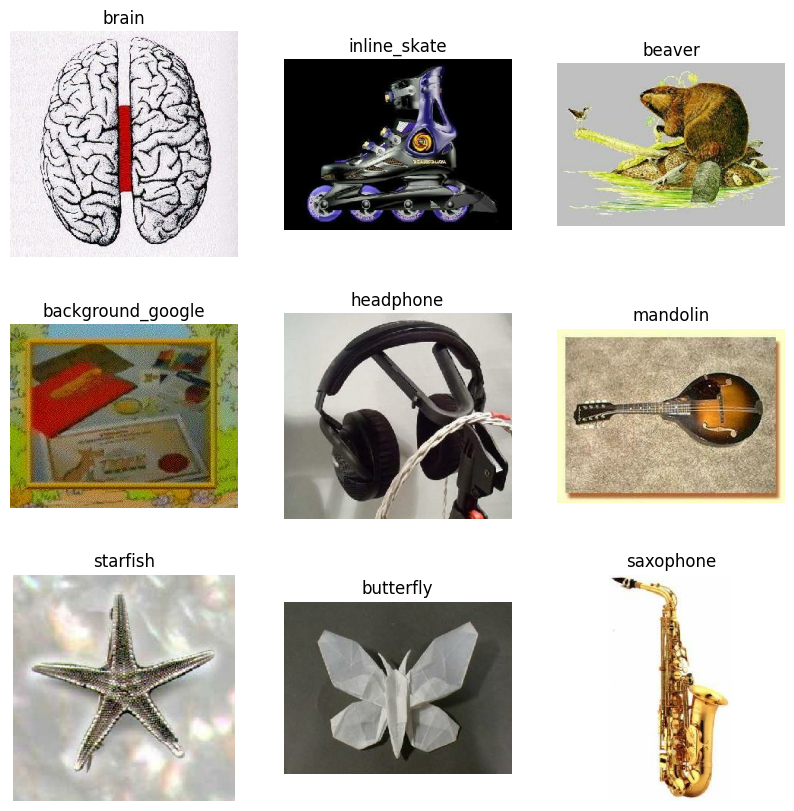

In [3]:
fig = plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(train_data.take(9)):
    ax = fig.add_subplot(3, 3, i + 1)
    ax.imshow(image.numpy())
    ax.set_title(class_names[label.numpy()])
    ax.axis('off')
plt.show()

### let's see how many data points do we have per class

In [4]:

import collections
label_counts = collections.Counter([label.numpy() for _, label in train_data])
print(label_counts)


Counter({54: 29, 46: 28, 16: 28, 47: 27, 40: 27, 52: 27, 58: 27, 72: 27, 98: 27, 96: 27, 55: 27, 29: 27, 27: 27, 100: 27, 21: 27, 94: 26, 43: 26, 15: 26, 74: 26, 59: 26, 30: 26, 84: 26, 75: 26, 20: 26, 0: 26, 51: 25, 7: 25, 45: 25, 97: 25, 36: 25, 73: 25, 17: 25, 44: 25, 65: 25, 81: 25, 31: 25, 77: 25, 89: 25, 83: 25, 4: 24, 13: 24, 70: 24, 8: 24, 92: 24, 23: 24, 25: 24, 39: 24, 50: 24, 12: 24, 9: 24, 28: 24, 91: 24, 53: 24, 3: 24, 68: 24, 69: 24, 95: 24, 85: 24, 71: 24, 22: 24, 41: 24, 33: 24, 6: 24, 24: 24, 10: 23, 88: 23, 78: 23, 67: 23, 19: 23, 101: 23, 35: 23, 93: 23, 90: 23, 80: 23, 38: 23, 2: 23, 63: 23, 32: 23, 34: 23, 61: 22, 87: 22, 79: 22, 26: 22, 56: 22, 48: 22, 42: 22, 5: 22, 14: 22, 11: 22, 66: 22, 99: 21, 60: 21, 1: 21, 64: 21, 18: 21, 37: 21, 76: 20, 82: 20, 86: 20, 57: 19, 62: 19, 49: 18})


### getting our class names

In [5]:
# Print all label names
print("Class Names:")
for i, class_name in enumerate(class_names):
    print(f"{i}: {class_name}")

Class Names:
0: accordion
1: airplanes
2: anchor
3: ant
4: background_google
5: barrel
6: bass
7: beaver
8: binocular
9: bonsai
10: brain
11: brontosaurus
12: buddha
13: butterfly
14: camera
15: cannon
16: car_side
17: ceiling_fan
18: cellphone
19: chair
20: chandelier
21: cougar_body
22: cougar_face
23: crab
24: crayfish
25: crocodile
26: crocodile_head
27: cup
28: dalmatian
29: dollar_bill
30: dolphin
31: dragonfly
32: electric_guitar
33: elephant
34: emu
35: euphonium
36: ewer
37: faces
38: faces_easy
39: ferry
40: flamingo
41: flamingo_head
42: garfield
43: gerenuk
44: gramophone
45: grand_piano
46: hawksbill
47: headphone
48: hedgehog
49: helicopter
50: ibis
51: inline_skate
52: joshua_tree
53: kangaroo
54: ketch
55: lamp
56: laptop
57: leopards
58: llama
59: lobster
60: lotus
61: mandolin
62: mayfly
63: menorah
64: metronome
65: minaret
66: motorbikes
67: nautilus
68: octopus
69: okapi
70: pagoda
71: panda
72: pigeon
73: pizza
74: platypus
75: pyramid
76: revolver
77: rhino
78: r

### background_google seems to be a garbage class since it contains a lot of images that are just random and not related, let's exclude it from the datasets

Training set size after filtering: 2424
Validation set size after filtering: 606


2024-10-31 23:13:15.697682: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Test set size after filtering: 5647


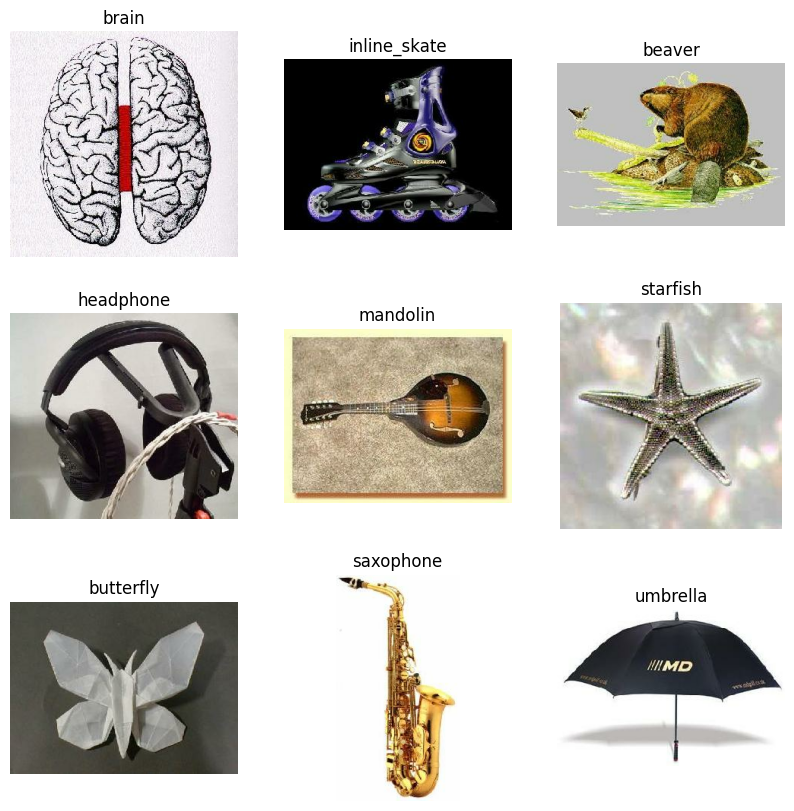

In [6]:
# get class names and find the index of "background_google" class
info = tfds.builder('caltech101').info
class_names = info.features['label'].names
google_background_index = class_names.index("background_google")

# remove "background_google" from the class names list
class_names = [name for name in class_names if name != "background_google"]

def filter_google_background(image, label):
    return tf.not_equal(label, google_background_index)

# filter the garbage class
train_data = train_data.filter(filter_google_background)
val_data = val_data.filter(filter_google_background)
test_data = test_data.filter(filter_google_background)

# adjust labels to account for the removal of "background_google"
def adjust_labels(image, label):
    return image, tf.where(label > google_background_index, label - 1, label)

train_data = train_data.map(adjust_labels)
val_data = val_data.map(adjust_labels)
test_data = test_data.map(adjust_labels)

print(f"Training set size after filtering: {len(list(train_data))}")
print(f"Validation set size after filtering: {len(list(val_data))}")
print(f"Test set size after filtering: {len(list(test_data))}")

fig = plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(train_data.take(9)):
    ax = fig.add_subplot(3, 3, i + 1)
    ax.imshow(image.numpy())
    ax.set_title(class_names[label.numpy()])
    ax.axis('off')
plt.show()

### background_google should be gone, all the classes and labels were also adjusted properly

In [7]:
# Print all label names
print("Class Names:")
for i, class_name in enumerate(class_names):
    print(f"{i}: {class_name}")

Class Names:
0: accordion
1: airplanes
2: anchor
3: ant
4: barrel
5: bass
6: beaver
7: binocular
8: bonsai
9: brain
10: brontosaurus
11: buddha
12: butterfly
13: camera
14: cannon
15: car_side
16: ceiling_fan
17: cellphone
18: chair
19: chandelier
20: cougar_body
21: cougar_face
22: crab
23: crayfish
24: crocodile
25: crocodile_head
26: cup
27: dalmatian
28: dollar_bill
29: dolphin
30: dragonfly
31: electric_guitar
32: elephant
33: emu
34: euphonium
35: ewer
36: faces
37: faces_easy
38: ferry
39: flamingo
40: flamingo_head
41: garfield
42: gerenuk
43: gramophone
44: grand_piano
45: hawksbill
46: headphone
47: hedgehog
48: helicopter
49: ibis
50: inline_skate
51: joshua_tree
52: kangaroo
53: ketch
54: lamp
55: laptop
56: leopards
57: llama
58: lobster
59: lotus
60: mandolin
61: mayfly
62: menorah
63: metronome
64: minaret
65: motorbikes
66: nautilus
67: octopus
68: okapi
69: pagoda
70: panda
71: pigeon
72: pizza
73: platypus
74: pyramid
75: revolver
76: rhino
77: rooster
78: saxophone
7

### normalize the data and generate new augmented data from the original training set 

In [8]:
def resize_image(image, label):
    image = tf.image.resize(image, [128, 128])
    return image, label

train_data = train_data.map(resize_image)
val_data = val_data.map(resize_image)
test_data = test_data.map(resize_image)

def normalize_image(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

train_data = train_data.map(normalize_image)
val_data = val_data.map(normalize_image)
test_data = test_data.map(normalize_image)

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomContrast(0.3),
    tf.keras.layers.RandomZoom(0.15),
    tf.keras.layers.RandomTranslation(0.15, 0.15)
])

def augment_image(image, label):
    image = data_augmentation(image)
    return image, label

def generate_augmented_data(train_data, number_of_augments):
    augmented_datasets = [train_data]  # original data

    for _ in range(number_of_augments):
        augmented_data = train_data.map(augment_image)
        augmented_datasets.append(augmented_data)

    # add new data to original dsta
    full_train_data = augmented_datasets[0]
    for aug_data in augmented_datasets[1:]:
        full_train_data = full_train_data.concatenate(aug_data)

    return full_train_data

train_data = generate_augmented_data(train_data, number_of_augments=4)
train_data_size = len(list(train_data))
train_data = train_data.shuffle(buffer_size=train_data_size)

def edge_detection(image, label):
    image_gray = tf.image.rgb_to_grayscale(image)
    image_gray = tf.expand_dims(image_gray, axis=0)
    edges = tf.image.sobel_edges(image_gray)
    edge_x = edges[..., 0]
    edge_y = edges[..., 1]
    edges = tf.sqrt(tf.square(edge_x) + tf.square(edge_y))
    edges = tf.squeeze(edges, axis=0)
    edges = tf.clip_by_value(edges, 0.0, 1.0)
    return edges, label

train_data = train_data.map(edge_detection)
val_data = val_data.map(edge_detection)
test_data = test_data.map(edge_detection)

# batch and prefetch data
train_data = train_data.batch(32, drop_remainder=True).prefetch(tf.data.AUTOTUNE)
val_data = val_data.batch(32, drop_remainder=True).prefetch(tf.data.AUTOTUNE)
test_data = test_data.batch(32, drop_remainder=True).prefetch(tf.data.AUTOTUNE)

In [9]:
print(f"Training set size: {len(list(train_data))}")
print(f"Validation set size: {len(list(val_data))}")
print(f"Test set size: {len(list(test_data))}")

for image, label in train_data.take(10):
    print(f"Image shape: {image.shape}")
    print(f"Label: {label.numpy()}")

2024-10-31 23:13:42.755257: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 8519 of 12120
2024-10-31 23:13:49.426784: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


Training set size: 378
Validation set size: 18
Test set size: 176


2024-10-31 23:14:05.629057: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 6640 of 12120
2024-10-31 23:14:15.630018: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 10841 of 12120
2024-10-31 23:14:18.617253: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


Image shape: (32, 128, 128, 1)
Label: [43 40 70 55 85 25  2  0 25 28 96 90 77 59 18 36 25 51 68 99 84  9 74 21
 83 18 22 26 65 92 92 77]
Image shape: (32, 128, 128, 1)
Label: [  6  32  28  23  89  89  32  37  59  26  52  32 100  92  43  22  78  12
  21  91  38  49   5 100  56  28  90  58  20  79  50  95]
Image shape: (32, 128, 128, 1)
Label: [39 16  0 80 18 77 68 55 34 33 95 37 72 65 38 92 57  5 90 90 22 26 32 78
  3 34 69 69 19 56 26 20]
Image shape: (32, 128, 128, 1)
Label: [30 16 10 25 77 55 56 96 76 84 65 76 62 45 81 99 17 24 34 76  5  1 29 28
 49 22 53 66  0 30 46  2]
Image shape: (32, 128, 128, 1)
Label: [55 66 88  1 51 99 34 96 31 80 47 53 94 44 39 71  7 53  5 43  1 98 43 83
 19 32 89 35 11 39 22 50]
Image shape: (32, 128, 128, 1)
Label: [30 64 57 22 40 87 12 46 59 76 30 40 42 38 19  9 83 66 30 14 93 62 72 32
 62 57 80 95 32 29 12 13]
Image shape: (32, 128, 128, 1)
Label: [52 18 62  6 97 47 54 50 14 54 46 45 21 31 22 96 75  2 89 32 39  8 21 93
 33 14  4 64 42 56 72 25]
Image sha

### utility function to print some performance metrics for the models

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

def print_results():
    # extract test images and labels from the test dataset
    test_images, test_labels = zip(*[(image, label) for image, label in tfds.as_numpy(test_data)])
    test_images = np.array([image for batch in test_images for image in batch])
    test_labels = np.array([label for batch in test_labels for label in batch])

    # generate predictions
    predictions = model.predict(test_images)
    predicted_classes = np.argmax(predictions, axis=1)

    # accuracy
    accuracy = accuracy_score(test_labels, predicted_classes)
    print(f"accuracy: {accuracy * 100:.2f}%")

    # precision, Recall, and F1 score (per class and average)
    precision = precision_score(test_labels, predicted_classes, average=None)
    recall = recall_score(test_labels, predicted_classes, average=None)
    f1 = f1_score(test_labels, predicted_classes, average=None)
    print("\nprecision, recall, F1 score for each class:")
    for i, class_name in enumerate(class_names[:101]):  # slice to ensure 101 items
        print(f"{class_name}: Precision={precision[i]:.2f}, Recall={recall[i]:.2f}, F1 Score={f1[i]:.2f}")

    # average scores
    avg_precision = precision_score(test_labels, predicted_classes, average='weighted')
    avg_recall = recall_score(test_labels, predicted_classes, average='weighted')
    avg_f1 = f1_score(test_labels, predicted_classes, average='weighted')
    print(f"\naverage precision: {avg_precision:.2f}")
    print(f"average recall: {avg_recall:.2f}")
    print(f"average F1 score: {avg_f1:.2f}")

    # full Classification Report
    print("\nclassification report:")
    print(classification_report(test_labels, predicted_classes, target_names=class_names[:101]))  # Ensure 101 target names

    plt.plot(history.history['accuracy'], label='train_accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(loc='lower right')
    plt.show()


### ensure that the model doesn't run out of data while training


In [11]:
# train_data = train_data.repeat()
# val_data = val_data.repeat()

# batch_size = 32

# train_data_size = tf.data.experimental.cardinality(train_data).numpy()
# steps_per_epoch = train_data_size // batch_size

### base or default model

Epoch 1/10


/opt/miniconda3/envs/ml/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-10-31 23:14:30.807838: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 6739 of 12120
2024-10-31 23:14:40.808436: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 11240 of 12120
2024-10-31 23:14:42.944869: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


    378/Unknown 89s 174ms/step - accuracy: 0.0451 - loss: 4.4173

2024-10-31 23:15:48.821288: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/opt/miniconda3/envs/ml/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


378/378 ━━━━━━━━━━━━━━━━━━━━ 90s 177ms/step - accuracy: 0.0452 - loss: 4.4165 - val_accuracy: 0.2319 - val_loss: 3.1881
Epoch 2/10


2024-10-31 23:15:59.909463: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 6680 of 12120
2024-10-31 23:16:09.913388: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 11170 of 12120
2024-10-31 23:16:12.138360: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 89s 176ms/step - accuracy: 0.2475 - loss: 3.2445 - val_accuracy: 0.3306 - val_loss: 2.6594
Epoch 3/10


2024-10-31 23:17:29.046614: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 6862 of 12120
2024-10-31 23:17:39.047121: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 11310 of 12120
2024-10-31 23:17:40.804905: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 89s 179ms/step - accuracy: 0.3569 - loss: 2.6729 - val_accuracy: 0.3947 - val_loss: 2.4492
Epoch 4/10


2024-10-31 23:18:58.466525: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 6356 of 12120
2024-10-31 23:19:08.468045: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 10286 of 12120
2024-10-31 23:19:13.036904: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 93s 182ms/step - accuracy: 0.4228 - loss: 2.3385 - val_accuracy: 0.4112 - val_loss: 2.4659
Epoch 5/10


2024-10-31 23:20:31.884574: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 6412 of 12120
2024-10-31 23:20:45.990898: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 93s 182ms/step - accuracy: 0.4694 - loss: 2.1464 - val_accuracy: 0.4375 - val_loss: 2.3359
Epoch 6/10


2024-10-31 23:22:04.802442: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 6290 of 12120
2024-10-31 23:22:19.181079: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 94s 183ms/step - accuracy: 0.5243 - loss: 1.9136 - val_accuracy: 0.4326 - val_loss: 2.4127
Epoch 7/10


2024-10-31 23:23:38.460866: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 6475 of 12120
2024-10-31 23:23:52.393527: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 93s 182ms/step - accuracy: 0.5508 - loss: 1.7970 - val_accuracy: 0.4227 - val_loss: 2.4677
Epoch 8/10


2024-10-31 23:25:11.423814: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 6250 of 12120
2024-10-31 23:25:21.425537: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 10258 of 12120
2024-10-31 23:25:25.987631: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 90s 172ms/step - accuracy: 0.5676 - loss: 1.6766 - val_accuracy: 0.4589 - val_loss: 2.3308
Epoch 9/10


2024-10-31 23:26:40.992977: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 6742 of 12120
2024-10-31 23:26:53.497250: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - accuracy: 0.6016 - loss: 1.5825

2024-10-31 23:27:57.587497: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


378/378 ━━━━━━━━━━━━━━━━━━━━ 88s 172ms/step - accuracy: 0.6016 - loss: 1.5824 - val_accuracy: 0.4539 - val_loss: 2.3727
Epoch 10/10


2024-10-31 23:28:08.548795: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 6795 of 12120
2024-10-31 23:28:18.549144: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 10768 of 12120
2024-10-31 23:28:21.678181: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 89s 175ms/step - accuracy: 0.6135 - loss: 1.4775 - val_accuracy: 0.4572 - val_loss: 2.3292
176/176 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step
accuracy: 62.04%

precision, recall, F1 score for each class:
accordion: Precision=0.33, Recall=0.60, F1 Score=0.43
airplanes: Precision=0.97, Recall=0.72, F1 Score=0.83
anchor: Precision=0.22, Recall=0.42, F1 Score=0.29
ant: Precision=0.00, Recall=0.00, F1 Score=0.00
barrel: Precision=0.10, Recall=0.18, F1 Score=0.13
bass: Precision=0.08, Recall=0.12, F1 Score=0.10
beaver: Precision=0.12, Recall=0.19, F1 Score=0.15
binocular: Precision=0.03, Recall=0.33, F1 Score=0.06
bonsai: Precision=0.61, Recall=0.44, F1 Score=0.51
brain: Precision=0.65, Recall=0.42, F1 Score=0.51
brontosaurus: Precision=0.08, Recall=0.31, F1 Score=0.13
buddha: Precision=0.55, Recall=0.55, F1 Score=0.55
butterfly: Precision=0.33, Recall=0.33, F1 Score=0.33
camera: Precision=0.27, Recall=0.50, F1 Score=0.35
cannon: Precision=0.00, Recall=0.00, F1 Score=0.00

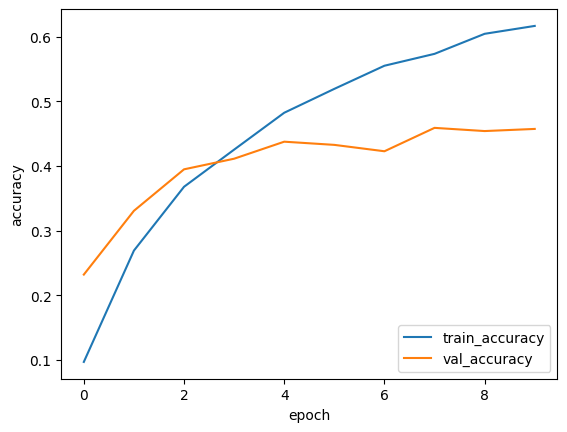

In [12]:

def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(len(class_names), activation='softmax')
    ])
    return model

model = create_model()
model.compile(    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, epochs=10, validation_data=val_data)

print_results()


### we are noticing some overfitting, introduce small dropout before the output layer

Epoch 1/10


/opt/miniconda3/envs/ml/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-10-31 23:29:50.063825: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 6646 of 12120
2024-10-31 23:30:02.468304: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


    378/Unknown 88s 171ms/step - accuracy: 0.0319 - loss: 4.4878

/opt/miniconda3/envs/ml/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


378/378 ━━━━━━━━━━━━━━━━━━━━ 89s 174ms/step - accuracy: 0.0320 - loss: 4.4872 - val_accuracy: 0.1760 - val_loss: 3.5095
Epoch 2/10


2024-10-31 23:31:18.251198: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 6626 of 12120
2024-10-31 23:31:28.255141: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 11015 of 12120
2024-10-31 23:31:30.834467: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 90s 177ms/step - accuracy: 0.1553 - loss: 3.6798 - val_accuracy: 0.2730 - val_loss: 3.0033
Epoch 3/10


2024-10-31 23:32:47.904555: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 6645 of 12120
2024-10-31 23:32:57.904730: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 11014 of 12120
2024-10-31 23:33:00.586087: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 88s 173ms/step - accuracy: 0.2250 - loss: 3.2688 - val_accuracy: 0.3306 - val_loss: 2.7235
Epoch 4/10


2024-10-31 23:34:16.127021: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 6676 of 12120
2024-10-31 23:34:28.935551: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 87s 170ms/step - accuracy: 0.2840 - loss: 2.9788 - val_accuracy: 0.3487 - val_loss: 2.5488
Epoch 5/10


2024-10-31 23:35:43.358212: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 6824 of 12120
2024-10-31 23:35:55.674000: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 88s 173ms/step - accuracy: 0.3069 - loss: 2.8230 - val_accuracy: 0.3651 - val_loss: 2.5004
Epoch 6/10


2024-10-31 23:37:11.396025: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 6542 of 12120
2024-10-31 23:37:21.396823: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 10929 of 12120
2024-10-31 23:37:24.216598: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 89s 174ms/step - accuracy: 0.3357 - loss: 2.6675 - val_accuracy: 0.3882 - val_loss: 2.4216
Epoch 7/10


2024-10-31 23:38:40.182861: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 6748 of 12120
2024-10-31 23:38:50.186165: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 11035 of 12120
2024-10-31 23:38:52.752587: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 88s 174ms/step - accuracy: 0.3639 - loss: 2.5397 - val_accuracy: 0.4260 - val_loss: 2.3078
Epoch 8/10


2024-10-31 23:40:08.582616: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 6562 of 12120
2024-10-31 23:40:21.632067: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 87s 170ms/step - accuracy: 0.3839 - loss: 2.4676 - val_accuracy: 0.4375 - val_loss: 2.2921
Epoch 9/10


2024-10-31 23:41:35.989182: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 6037 of 12120
2024-10-31 23:41:45.989476: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 9807 of 12120
2024-10-31 23:41:51.895188: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 99s 192ms/step - accuracy: 0.4016 - loss: 2.3556 - val_accuracy: 0.4243 - val_loss: 2.3146
Epoch 10/10


2024-10-31 23:43:14.678244: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 6213 of 12120
2024-10-31 23:43:29.636405: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 97s 191ms/step - accuracy: 0.4057 - loss: 2.3547 - val_accuracy: 0.4359 - val_loss: 2.2864
176/176 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step
accuracy: 57.63%

precision, recall, F1 score for each class:
accordion: Precision=0.33, Recall=0.64, F1 Score=0.43
airplanes: Precision=0.92, Recall=0.72, F1 Score=0.81
anchor: Precision=0.14, Recall=0.25, F1 Score=0.18
ant: Precision=0.15, Recall=0.25, F1 Score=0.19
barrel: Precision=0.07, Recall=0.18, F1 Score=0.10
bass: Precision=0.16, Recall=0.12, F1 Score=0.14
beaver: Precision=0.02, Recall=0.06, F1 Score=0.03
binocular: Precision=0.04, Recall=0.33, F1 Score=0.07
bonsai: Precision=0.52, Recall=0.59, F1 Score=0.55
brain: Precision=0.54, Recall=0.32, F1 Score=0.40
brontosaurus: Precision=0.12, Recall=0.23, F1 Score=0.16
buddha: Precision=0.53, Recall=0.56, F1 Score=0.55
butterfly: Precision=0.55, Recall=0.27, F1 Score=0.36
camera: Precision=0.36, Recall=0.50, F1 Score=0.42
cannon: Precision=0.03, Recall=0.08, F1 Score=0.0

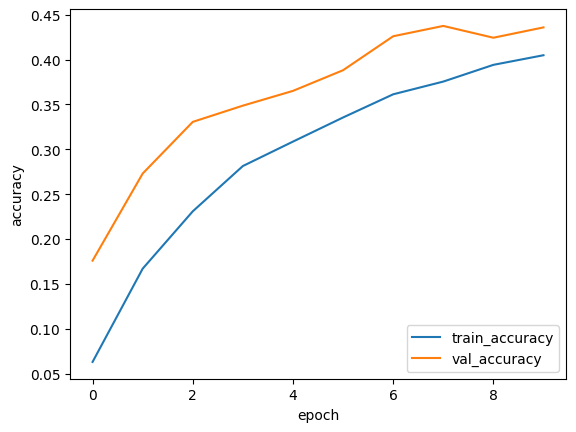

In [13]:

# model with dropout 0.2
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(len(class_names), activation='softmax')
    ])
    return model

model = create_model()
# larger learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, epochs=10, validation_data=val_data)

print_results()


### overfitting seems to be fixed thanks to the dropout layer, increase the number of epochs to see if the accuracy keeps increasing

### let's now come up with a more complex network to see if that also helps further increase the accuracy of the model, let's add an extra dense layer and also more dropout layers 

Epoch 1/20


/opt/miniconda3/envs/ml/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-10-31 23:45:08.426344: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 6048 of 12120
2024-10-31 23:45:18.427445: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 9877 of 12120
2024-10-31 23:45:24.233743: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


    378/Unknown 165s 360ms/step - accuracy: 0.0538 - loss: 4.6461

/opt/miniconda3/envs/ml/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


378/378 ━━━━━━━━━━━━━━━━━━━━ 167s 364ms/step - accuracy: 0.0539 - loss: 4.6451 - val_accuracy: 0.0099 - val_loss: 9.0764
Epoch 2/20


2024-10-31 23:47:52.023533: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 6200 of 12120
2024-10-31 23:48:02.023937: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 10066 of 12120
2024-10-31 23:48:07.461075: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 164s 365ms/step - accuracy: 0.1740 - loss: 3.6086 - val_accuracy: 0.1036 - val_loss: 4.8089
Epoch 3/20


2024-10-31 23:50:35.580737: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 6219 of 12120
2024-10-31 23:50:45.581253: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 10113 of 12120
2024-10-31 23:50:50.521709: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 159s 355ms/step - accuracy: 0.2840 - loss: 3.0641 - val_accuracy: 0.3240 - val_loss: 2.8033
Epoch 4/20


2024-10-31 23:53:14.695706: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 6173 of 12120
2024-10-31 23:53:24.696926: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 10115 of 12120
2024-10-31 23:53:30.232732: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step - accuracy: 0.3554 - loss: 2.6853

2024-10-31 23:55:45.584556: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


378/378 ━━━━━━━━━━━━━━━━━━━━ 162s 362ms/step - accuracy: 0.3554 - loss: 2.6852 - val_accuracy: 0.3289 - val_loss: 3.0593
Epoch 5/20


2024-10-31 23:55:57.126860: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 6236 of 12120
2024-10-31 23:56:07.128173: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 9944 of 12120
2024-10-31 23:56:12.588989: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 160s 355ms/step - accuracy: 0.4167 - loss: 2.3864 - val_accuracy: 0.3799 - val_loss: 2.4974
Epoch 6/20


2024-10-31 23:58:36.900662: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 6147 of 12120
2024-10-31 23:58:46.902326: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 10054 of 12120
2024-10-31 23:58:52.046004: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 163s 363ms/step - accuracy: 0.4573 - loss: 2.1805 - val_accuracy: 0.4326 - val_loss: 2.3894
Epoch 7/20


2024-11-01 00:01:19.502234: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 6184 of 12120
2024-11-01 00:01:34.671777: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 160s 355ms/step - accuracy: 0.5059 - loss: 1.9872 - val_accuracy: 0.4704 - val_loss: 2.0142
Epoch 8/20


2024-11-01 00:03:59.281811: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 6234 of 12120
2024-11-01 00:04:09.283103: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 10085 of 12120
2024-11-01 00:04:14.579452: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 161s 358ms/step - accuracy: 0.5372 - loss: 1.8441 - val_accuracy: 0.4819 - val_loss: 1.9870
Epoch 9/20


2024-11-01 00:06:40.189977: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 6168 of 12120
2024-11-01 00:06:55.672542: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 163s 363ms/step - accuracy: 0.5612 - loss: 1.7080 - val_accuracy: 0.5378 - val_loss: 1.6595
Epoch 10/20


2024-11-01 00:09:22.845507: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 6230 of 12120
2024-11-01 00:09:32.856203: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 10172 of 12120
2024-11-01 00:09:38.149664: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 161s 358ms/step - accuracy: 0.6059 - loss: 1.5337 - val_accuracy: 0.5280 - val_loss: 1.6657
Epoch 11/20


2024-11-01 00:12:03.633733: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 6237 of 12120
2024-11-01 00:12:13.636073: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 10021 of 12120
2024-11-01 00:12:19.043376: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 163s 364ms/step - accuracy: 0.6223 - loss: 1.4590 - val_accuracy: 0.5296 - val_loss: 1.8359
Epoch 12/20


2024-11-01 00:14:46.739971: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 6162 of 12120
2024-11-01 00:14:56.740677: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 10127 of 12120
2024-11-01 00:15:01.748082: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 163s 364ms/step - accuracy: 0.6518 - loss: 1.3249 - val_accuracy: 0.5312 - val_loss: 1.7685
Epoch 13/20


2024-11-01 00:17:29.527408: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 6186 of 12120
2024-11-01 00:17:39.528483: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 10097 of 12120
2024-11-01 00:17:44.723519: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 168s 376ms/step - accuracy: 0.6726 - loss: 1.2417 - val_accuracy: 0.5082 - val_loss: 1.9655
Epoch 14/20


2024-11-01 00:20:17.045205: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 6276 of 12120
2024-11-01 00:20:32.776762: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 161s 358ms/step - accuracy: 0.6943 - loss: 1.1653 - val_accuracy: 0.5724 - val_loss: 1.5783
Epoch 15/20


2024-11-01 00:22:58.482466: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 6164 of 12120
2024-11-01 00:23:08.483881: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 9916 of 12120
2024-11-01 00:23:14.362748: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 161s 358ms/step - accuracy: 0.6936 - loss: 1.1331 - val_accuracy: 0.5395 - val_loss: 1.7609
Epoch 16/20


2024-11-01 00:25:39.888686: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 7317 of 12120
2024-11-01 00:25:49.892685: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 11515 of 12120
2024-11-01 00:25:51.332969: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 144s 324ms/step - accuracy: 0.7186 - loss: 1.0504 - val_accuracy: 0.5921 - val_loss: 1.5337
Epoch 17/20


2024-11-01 00:28:03.872054: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 6519 of 12120
2024-11-01 00:28:13.872188: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 10626 of 12120
2024-11-01 00:28:17.344197: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 146s 324ms/step - accuracy: 0.7270 - loss: 1.0180 - val_accuracy: 0.5444 - val_loss: 1.8322
Epoch 18/20


2024-11-01 00:30:29.898548: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 6665 of 12120
2024-11-01 00:30:39.900817: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 10952 of 12120
2024-11-01 00:30:42.608263: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 148s 331ms/step - accuracy: 0.7400 - loss: 0.9706 - val_accuracy: 0.5970 - val_loss: 1.5510
Epoch 19/20


2024-11-01 00:32:57.859679: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 6547 of 12120
2024-11-01 00:33:07.861309: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 10738 of 12120
2024-11-01 00:33:11.074369: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 145s 322ms/step - accuracy: 0.7500 - loss: 0.9206 - val_accuracy: 0.5855 - val_loss: 1.5839
Epoch 20/20


2024-11-01 00:35:23.042788: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 6796 of 12120
2024-11-01 00:35:35.500024: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 144s 322ms/step - accuracy: 0.7594 - loss: 0.8802 - val_accuracy: 0.6053 - val_loss: 1.4904
176/176 ━━━━━━━━━━━━━━━━━━━━ 12s 67ms/step
accuracy: 71.41%

precision, recall, F1 score for each class:
accordion: Precision=0.73, Recall=0.76, F1 Score=0.75
airplanes: Precision=0.99, Recall=0.77, F1 Score=0.86
anchor: Precision=0.29, Recall=0.50, F1 Score=0.36
ant: Precision=0.12, Recall=0.42, F1 Score=0.19
barrel: Precision=0.27, Recall=0.24, F1 Score=0.25
bass: Precision=0.27, Recall=0.33, F1 Score=0.30
beaver: Precision=0.16, Recall=0.38, F1 Score=0.22
binocular: Precision=0.07, Recall=0.33, F1 Score=0.12
bonsai: Precision=0.82, Recall=0.57, F1 Score=0.67
brain: Precision=0.71, Recall=0.48, F1 Score=0.58
brontosaurus: Precision=0.41, Recall=0.54, F1 Score=0.47
buddha: Precision=0.89, Recall=0.62, F1 Score=0.73
butterfly: Precision=0.69, Recall=0.52, F1 Score=0.59
camera: Precision=0.67, Recall=0.50, F1 Score=0.57
cannon: Precision=0.12, Recall=0.33, F1 Score=0.

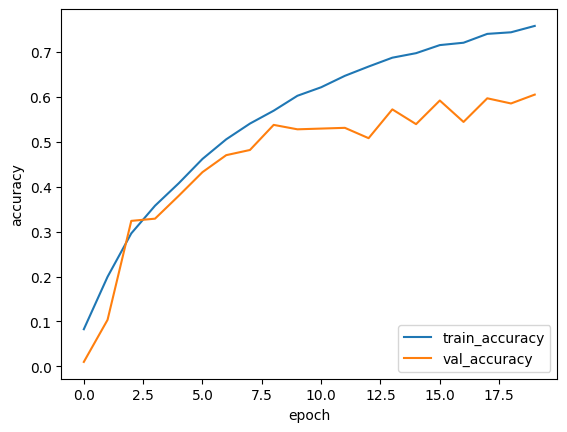

In [14]:
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.25),

        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.25),

        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.3),

        tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),  
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.3),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'),  
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),  # higher dropout to regularize

        tf.keras.layers.Dense(len(class_names), activation='softmax')
    ])
    return model

model = create_model()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(train_data, epochs=20, validation_data=val_data)

print_results()


### seems like we're going in the right direction, let's now implement a dynamic learning rate

Epoch 1/35


/opt/miniconda3/envs/ml/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-11-01 00:38:07.222062: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 6419 of 12120
2024-11-01 00:38:20.432659: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


    378/Unknown 161s 353ms/step - accuracy: 0.0365 - loss: 5.0072

/opt/miniconda3/envs/ml/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


378/378 ━━━━━━━━━━━━━━━━━━━━ 163s 357ms/step - accuracy: 0.0365 - loss: 5.0061 - val_accuracy: 0.0164 - val_loss: 9.7743
Epoch 2/35


2024-11-01 00:40:45.519224: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 6512 of 12120
2024-11-01 00:40:58.508614: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 162s 368ms/step - accuracy: 0.1131 - loss: 3.9968 - val_accuracy: 0.0559 - val_loss: 4.7323
Epoch 3/35


2024-11-01 00:43:27.998186: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 6308 of 12120
2024-11-01 00:43:37.999398: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 10362 of 12120
2024-11-01 00:43:42.332522: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 170s 384ms/step - accuracy: 0.2068 - loss: 3.3730 - val_accuracy: 0.2336 - val_loss: 3.1723
Epoch 4/35


2024-11-01 00:46:17.695008: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 6319 of 12120
2024-11-01 00:46:32.094666: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 169s 381ms/step - accuracy: 0.2942 - loss: 2.8991 - val_accuracy: 0.2730 - val_loss: 3.2525
Epoch 5/35


2024-11-01 00:49:06.353251: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 6347 of 12120
2024-11-01 00:49:20.568391: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 167s 376ms/step - accuracy: 0.3509 - loss: 2.6278 - val_accuracy: 0.3717 - val_loss: 2.3791
Epoch 6/35


2024-11-01 00:51:52.897185: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 6362 of 12120
2024-11-01 00:52:06.657605: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 169s 383ms/step - accuracy: 0.4139 - loss: 2.3376 - val_accuracy: 0.4178 - val_loss: 2.2772
Epoch 7/35


2024-11-01 00:54:41.559696: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 6470 of 12120
2024-11-01 00:54:55.350235: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 169s 384ms/step - accuracy: 0.4591 - loss: 2.1370 - val_accuracy: 0.4720 - val_loss: 1.9044
Epoch 8/35


2024-11-01 00:57:30.697357: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 6298 of 12120
2024-11-01 00:57:40.700465: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 10295 of 12120
2024-11-01 00:57:45.121482: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 168s 379ms/step - accuracy: 0.4894 - loss: 1.9730 - val_accuracy: 0.4868 - val_loss: 1.9433
Epoch 9/35


2024-11-01 01:00:18.678690: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 6365 of 12120
2024-11-01 01:00:28.680905: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 10343 of 12120
2024-11-01 01:00:33.099013: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 166s 373ms/step - accuracy: 0.5308 - loss: 1.7891 - val_accuracy: 0.5016 - val_loss: 1.7888
Epoch 10/35


2024-11-01 01:03:04.378026: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 6229 of 12120
2024-11-01 01:03:19.024138: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 171s 388ms/step - accuracy: 0.5576 - loss: 1.6901 - val_accuracy: 0.5280 - val_loss: 1.7919
Epoch 11/35


2024-11-01 01:05:55.815628: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 6447 of 12120
2024-11-01 01:06:05.816108: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 10578 of 12120
2024-11-01 01:06:09.349782: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 169s 385ms/step - accuracy: 0.5701 - loss: 1.5964 - val_accuracy: 0.5280 - val_loss: 1.6749
Epoch 12/35


2024-11-01 01:08:44.970216: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 6280 of 12120
2024-11-01 01:08:54.970822: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 10372 of 12120
2024-11-01 01:08:59.329659: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 170s 386ms/step - accuracy: 0.6106 - loss: 1.4445 - val_accuracy: 0.5362 - val_loss: 1.7696
Epoch 13/35


2024-11-01 01:11:35.387184: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 6323 of 12120
2024-11-01 01:11:45.387300: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 10298 of 12120
2024-11-01 01:11:49.793577: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 171s 386ms/step - accuracy: 0.6361 - loss: 1.3860 - val_accuracy: 0.5658 - val_loss: 1.5802
Epoch 14/35


2024-11-01 01:14:25.974893: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 6290 of 12120
2024-11-01 01:14:40.239990: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 172s 389ms/step - accuracy: 0.6412 - loss: 1.3038 - val_accuracy: 0.5543 - val_loss: 1.6082
Epoch 15/35


2024-11-01 01:17:17.550245: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 6424 of 12120
2024-11-01 01:17:31.547125: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 169s 383ms/step - accuracy: 0.6722 - loss: 1.2212 - val_accuracy: 0.5493 - val_loss: 1.5591
Epoch 16/35


2024-11-01 01:19:56.703448: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-11-01 01:20:06.763207: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 6303 of 12120
2024-11-01 01:20:20.998265: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 170s 384ms/step - accuracy: 0.6766 - loss: 1.1949 - val_accuracy: 0.5855 - val_loss: 1.5166
Epoch 17/35


2024-11-01 01:22:56.438297: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 6378 of 12120
2024-11-01 01:23:10.735392: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 165s 372ms/step - accuracy: 0.6849 - loss: 1.1416 - val_accuracy: 0.5609 - val_loss: 1.7109
Epoch 18/35


2024-11-01 01:25:41.632835: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 6401 of 12120
2024-11-01 01:25:55.548253: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 170s 387ms/step - accuracy: 0.7039 - loss: 1.0634 - val_accuracy: 0.5658 - val_loss: 1.6267
Epoch 19/35


2024-11-01 01:28:32.070532: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 6434 of 12120
2024-11-01 01:28:45.987294: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 168s 379ms/step - accuracy: 0.7099 - loss: 1.0421 - val_accuracy: 0.5806 - val_loss: 1.5671
Epoch 20/35


2024-11-01 01:31:19.698932: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 6379 of 12120
2024-11-01 01:31:33.646998: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 169s 383ms/step - accuracy: 0.7196 - loss: 1.0059 - val_accuracy: 0.5921 - val_loss: 1.4916
Epoch 21/35


2024-11-01 01:34:08.519364: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 6344 of 12120
2024-11-01 01:34:18.518610: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 10416 of 12120
2024-11-01 01:34:22.718106: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 170s 385ms/step - accuracy: 0.7288 - loss: 0.9877 - val_accuracy: 0.5888 - val_loss: 1.4952
Epoch 22/35


2024-11-01 01:36:58.537634: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 6355 of 12120
2024-11-01 01:37:08.542169: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 10301 of 12120
2024-11-01 01:37:13.143274: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 167s 377ms/step - accuracy: 0.7428 - loss: 0.9286 - val_accuracy: 0.5691 - val_loss: 1.6610
Epoch 23/35


2024-11-01 01:39:45.994755: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 6393 of 12120
2024-11-01 01:39:59.618342: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 170s 386ms/step - accuracy: 0.7696 - loss: 0.8436 - val_accuracy: 0.5938 - val_loss: 1.6629
Epoch 24/35


2024-11-01 01:42:35.584691: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 6455 of 12120
2024-11-01 01:42:45.588323: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 10443 of 12120
2024-11-01 01:42:49.956312: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 171s 388ms/step - accuracy: 0.7706 - loss: 0.8277 - val_accuracy: 0.6053 - val_loss: 1.4604
Epoch 25/35


2024-11-01 01:45:26.698799: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 6281 of 12120
2024-11-01 01:45:36.699464: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 10231 of 12120
2024-11-01 01:45:41.341409: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 163s 365ms/step - accuracy: 0.7761 - loss: 0.7954 - val_accuracy: 0.6069 - val_loss: 1.4959
Epoch 26/35


2024-11-01 01:48:09.645879: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 8965 of 12120
2024-11-01 01:48:14.406621: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 92s 205ms/step - accuracy: 0.7778 - loss: 0.7711 - val_accuracy: 0.6053 - val_loss: 1.4844
Epoch 27/35


2024-11-01 01:49:42.054957: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 9000 of 12120
2024-11-01 01:49:46.743128: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 92s 205ms/step - accuracy: 0.7837 - loss: 0.7661 - val_accuracy: 0.6168 - val_loss: 1.4152
Epoch 28/35


2024-11-01 01:51:14.424842: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 9013 of 12120
2024-11-01 01:51:19.127196: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 94s 210ms/step - accuracy: 0.7844 - loss: 0.7339 - val_accuracy: 0.5954 - val_loss: 1.5082
Epoch 29/35


2024-11-01 01:52:48.740745: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 9003 of 12120
2024-11-01 01:52:53.425955: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 93s 207ms/step - accuracy: 0.8006 - loss: 0.6965 - val_accuracy: 0.6069 - val_loss: 1.4439
Epoch 30/35


2024-11-01 01:54:21.943336: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 9041 of 12120
2024-11-01 01:54:26.567238: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 95s 211ms/step - accuracy: 0.8053 - loss: 0.6903 - val_accuracy: 0.6086 - val_loss: 1.4418
Epoch 31/35


2024-11-01 01:55:56.489931: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 9030 of 12120
2024-11-01 01:56:01.134705: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 94s 209ms/step - accuracy: 0.8131 - loss: 0.6574 - val_accuracy: 0.5263 - val_loss: 1.9011
Epoch 32/35


2024-11-01 01:57:30.299299: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 8994 of 12120
2024-11-01 01:57:34.979373: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 96s 214ms/step - accuracy: 0.8128 - loss: 0.6545 - val_accuracy: 0.6168 - val_loss: 1.4849
Epoch 33/35


2024-11-01 01:59:06.099840: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 8843 of 12120
2024-11-01 01:59:11.036584: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 93s 207ms/step - accuracy: 0.8299 - loss: 0.6063 - val_accuracy: 0.6036 - val_loss: 1.5338
Epoch 34/35


2024-11-01 02:00:39.355735: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 9027 of 12120
2024-11-01 02:00:43.989885: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 93s 206ms/step - accuracy: 0.8177 - loss: 0.6473 - val_accuracy: 0.6053 - val_loss: 1.5273
Epoch 35/35


2024-11-01 02:02:12.183478: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 8950 of 12120
2024-11-01 02:02:16.911257: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 93s 206ms/step - accuracy: 0.8186 - loss: 0.6198 - val_accuracy: 0.6102 - val_loss: 1.5600
176/176 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step
accuracy: 74.02%

precision, recall, F1 score for each class:
accordion: Precision=0.38, Recall=0.84, F1 Score=0.52
airplanes: Precision=0.99, Recall=0.76, F1 Score=0.86
anchor: Precision=0.33, Recall=0.58, F1 Score=0.42
ant: Precision=0.15, Recall=0.33, F1 Score=0.21
barrel: Precision=0.23, Recall=0.59, F1 Score=0.33
bass: Precision=0.40, Recall=0.33, F1 Score=0.36
beaver: Precision=0.17, Recall=0.44, F1 Score=0.25
binocular: Precision=0.05, Recall=0.33, F1 Score=0.09
bonsai: Precision=0.83, Recall=0.62, F1 Score=0.71
brain: Precision=0.79, Recall=0.45, F1 Score=0.58
brontosaurus: Precision=0.44, Recall=0.54, F1 Score=0.48
buddha: Precision=0.94, Recall=0.62, F1 Score=0.75
butterfly: Precision=0.71, Recall=0.48, F1 Score=0.57
camera: Precision=0.85, Recall=0.55, F1 Score=0.67
cannon: Precision=0.18, Recall=0.25, F1 Score=0.21

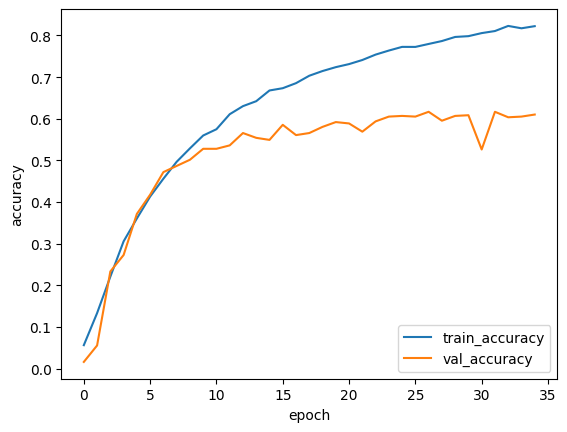

In [15]:
# this is the same as the model right above but with a changing learning rate
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.3), 

        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.3),

        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.3), 

        tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),  
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.3), 

        tf.keras.layers.Conv2D(512, (3, 3), activation='relu'),  
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.3),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'), 
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.5),  

        tf.keras.layers.Dense(len(class_names), activation='softmax')
    ])
    return model

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=5000,
    decay_rate=0.95)

model = create_model()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(train_data, epochs=35, validation_data=val_data)

print_results()


### let's double the units of every layer

Epoch 1/35


/opt/miniconda3/envs/ml/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-11-01 02:03:57.280216: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 9005 of 12120
2024-11-01 02:04:01.930597: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


    378/Unknown 242s 596ms/step - accuracy: 0.0463 - loss: 5.0731

/opt/miniconda3/envs/ml/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


378/378 ━━━━━━━━━━━━━━━━━━━━ 245s 602ms/step - accuracy: 0.0464 - loss: 5.0719 - val_accuracy: 0.0148 - val_loss: 9.5041
Epoch 2/35


2024-11-01 02:07:59.840219: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 8986 of 12120
2024-11-01 02:08:04.561591: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 241s 597ms/step - accuracy: 0.1643 - loss: 3.7621 - val_accuracy: 0.2155 - val_loss: 3.4104
Epoch 3/35


2024-11-01 02:12:00.566927: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 9022 of 12120
2024-11-01 02:12:05.279976: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 243s 602ms/step - accuracy: 0.2929 - loss: 2.9793 - val_accuracy: 0.3898 - val_loss: 2.3378
Epoch 4/35


2024-11-01 02:16:03.128782: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 9010 of 12120
2024-11-01 02:16:07.854615: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 243s 602ms/step - accuracy: 0.3814 - loss: 2.4972 - val_accuracy: 0.3947 - val_loss: 2.2754
Epoch 5/35


2024-11-01 02:20:05.906244: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 8996 of 12120
2024-11-01 02:20:10.579742: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 242s 601ms/step - accuracy: 0.4615 - loss: 2.1230 - val_accuracy: 0.4342 - val_loss: 2.1827
Epoch 6/35


2024-11-01 02:24:08.039120: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 8954 of 12120
2024-11-01 02:24:12.741389: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 241s 599ms/step - accuracy: 0.5168 - loss: 1.8412 - val_accuracy: 0.4951 - val_loss: 1.8794
Epoch 7/35


2024-11-01 02:28:09.492585: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 8928 of 12120
2024-11-01 02:28:14.280448: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 242s 599ms/step - accuracy: 0.5635 - loss: 1.6403 - val_accuracy: 0.5214 - val_loss: 1.7235
Epoch 8/35


2024-11-01 02:32:11.123375: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 9015 of 12120
2024-11-01 02:32:15.748210: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 243s 604ms/step - accuracy: 0.6042 - loss: 1.4770 - val_accuracy: 0.5757 - val_loss: 1.5555
Epoch 9/35


2024-11-01 02:36:14.456740: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 9019 of 12120
2024-11-01 02:36:19.081615: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 244s 607ms/step - accuracy: 0.6549 - loss: 1.2663 - val_accuracy: 0.5164 - val_loss: 1.8143
Epoch 10/35


2024-11-01 02:40:18.755321: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 8906 of 12120
2024-11-01 02:40:23.573774: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 243s 602ms/step - accuracy: 0.6689 - loss: 1.2086 - val_accuracy: 0.5576 - val_loss: 1.6468
Epoch 11/35


2024-11-01 02:44:21.524127: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 9026 of 12120
2024-11-01 02:44:26.163245: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 243s 602ms/step - accuracy: 0.6944 - loss: 1.1041 - val_accuracy: 0.5263 - val_loss: 1.8359
Epoch 12/35


2024-11-01 02:48:24.306367: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 8968 of 12120
2024-11-01 02:48:28.983446: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 244s 604ms/step - accuracy: 0.7288 - loss: 0.9671 - val_accuracy: 0.4885 - val_loss: 1.9362
Epoch 13/35


2024-11-01 02:52:27.905865: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 9027 of 12120
2024-11-01 02:52:32.529790: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 247s 613ms/step - accuracy: 0.7521 - loss: 0.9076 - val_accuracy: 0.5888 - val_loss: 1.5185
Epoch 14/35


2024-11-01 02:56:34.495939: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 9003 of 12120
2024-11-01 02:56:39.164832: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 245s 609ms/step - accuracy: 0.7665 - loss: 0.8289 - val_accuracy: 0.5905 - val_loss: 1.4814
Epoch 15/35


2024-11-01 03:00:39.801624: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 9020 of 12120
2024-11-01 03:00:44.443273: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 243s 603ms/step - accuracy: 0.7796 - loss: 0.7663 - val_accuracy: 0.5592 - val_loss: 1.6693
Epoch 16/35


2024-11-01 03:04:42.589508: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 9022 of 12120
2024-11-01 03:04:47.216954: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 244s 605ms/step - accuracy: 0.7856 - loss: 0.7603 - val_accuracy: 0.5691 - val_loss: 1.6671
Epoch 17/35


2024-11-01 03:08:46.325960: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 8987 of 12120
2024-11-01 03:08:51.040824: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 246s 611ms/step - accuracy: 0.8016 - loss: 0.6956 - val_accuracy: 0.6184 - val_loss: 1.3894
Epoch 18/35


2024-11-01 03:12:52.284959: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 9002 of 12120
2024-11-01 03:12:56.944511: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 242s 599ms/step - accuracy: 0.8202 - loss: 0.6286 - val_accuracy: 0.6020 - val_loss: 1.4842
Epoch 19/35


2024-11-01 03:16:53.942640: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 9042 of 12120
2024-11-01 03:16:58.578531: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 244s 606ms/step - accuracy: 0.8290 - loss: 0.6106 - val_accuracy: 0.5970 - val_loss: 1.5402
Epoch 20/35


2024-11-01 03:20:57.940669: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 8953 of 12120
2024-11-01 03:21:02.670515: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 242s 601ms/step - accuracy: 0.8365 - loss: 0.5650 - val_accuracy: 0.6086 - val_loss: 1.5109
Epoch 21/35


2024-11-01 03:25:00.164488: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 9043 of 12120
2024-11-01 03:25:04.946677: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 242s 600ms/step - accuracy: 0.8280 - loss: 0.6054 - val_accuracy: 0.6135 - val_loss: 1.5196
Epoch 22/35


2024-11-01 03:29:02.170067: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 8991 of 12120
2024-11-01 03:29:06.923285: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 243s 603ms/step - accuracy: 0.8387 - loss: 0.5499 - val_accuracy: 0.6020 - val_loss: 1.5797
Epoch 23/35


2024-11-01 03:33:05.409965: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 8987 of 12120
2024-11-01 03:33:10.100305: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 242s 601ms/step - accuracy: 0.8530 - loss: 0.5165 - val_accuracy: 0.5987 - val_loss: 1.6035
Epoch 24/35


2024-11-01 03:37:07.666650: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 8897 of 12120
2024-11-01 03:37:12.507004: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 243s 604ms/step - accuracy: 0.8541 - loss: 0.4993 - val_accuracy: 0.5822 - val_loss: 1.7343
Epoch 25/35


2024-11-01 03:41:11.010550: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 8903 of 12120
2024-11-01 03:41:15.828287: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 241s 597ms/step - accuracy: 0.8676 - loss: 0.4486 - val_accuracy: 0.5970 - val_loss: 1.6445
Epoch 26/35


2024-11-01 03:45:11.896530: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 8959 of 12120
2024-11-01 03:45:16.598199: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 245s 609ms/step - accuracy: 0.8679 - loss: 0.4554 - val_accuracy: 0.5987 - val_loss: 1.6261
Epoch 27/35


2024-11-01 03:49:17.338302: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 8978 of 12120
2024-11-01 03:49:22.114139: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 244s 604ms/step - accuracy: 0.8802 - loss: 0.4248 - val_accuracy: 0.6086 - val_loss: 1.5665
Epoch 28/35


2024-11-01 03:53:20.921564: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 8994 of 12120
2024-11-01 03:53:25.643654: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 242s 601ms/step - accuracy: 0.8792 - loss: 0.4047 - val_accuracy: 0.6234 - val_loss: 1.5620
Epoch 29/35


2024-11-01 03:57:22.972164: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 8984 of 12120
2024-11-01 03:57:27.644331: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 244s 606ms/step - accuracy: 0.8851 - loss: 0.3873 - val_accuracy: 0.5938 - val_loss: 1.8094
Epoch 30/35


2024-11-01 04:01:27.324288: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 9033 of 12120
2024-11-01 04:01:31.990091: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 240s 594ms/step - accuracy: 0.8826 - loss: 0.3973 - val_accuracy: 0.6151 - val_loss: 1.6411
Epoch 31/35


2024-11-01 04:05:26.908134: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 8993 of 12120
2024-11-01 04:05:31.584720: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 244s 606ms/step - accuracy: 0.8945 - loss: 0.3558 - val_accuracy: 0.6431 - val_loss: 1.4492
Epoch 32/35


2024-11-01 04:09:30.955555: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 8985 of 12120
2024-11-01 04:09:35.629625: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 242s 601ms/step - accuracy: 0.8949 - loss: 0.3500 - val_accuracy: 0.6316 - val_loss: 1.6950
Epoch 33/35


2024-11-01 04:13:33.044368: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 9016 of 12120
2024-11-01 04:13:37.658788: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 244s 607ms/step - accuracy: 0.9071 - loss: 0.3287 - val_accuracy: 0.6151 - val_loss: 1.6321
Epoch 34/35


2024-11-01 04:17:37.344122: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 9025 of 12120
2024-11-01 04:17:41.983890: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 243s 604ms/step - accuracy: 0.8959 - loss: 0.3505 - val_accuracy: 0.6053 - val_loss: 1.6370
Epoch 35/35


2024-11-01 04:21:40.559965: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 8908 of 12120
2024-11-01 04:21:45.320885: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 242s 600ms/step - accuracy: 0.9040 - loss: 0.3276 - val_accuracy: 0.6299 - val_loss: 1.6205
176/176 ━━━━━━━━━━━━━━━━━━━━ 21s 117ms/step
accuracy: 76.12%

precision, recall, F1 score for each class:
accordion: Precision=0.33, Recall=0.92, F1 Score=0.49
airplanes: Precision=0.98, Recall=0.86, F1 Score=0.92
anchor: Precision=0.54, Recall=0.58, F1 Score=0.56
ant: Precision=0.19, Recall=0.25, F1 Score=0.21
barrel: Precision=0.24, Recall=0.35, F1 Score=0.29
bass: Precision=0.43, Recall=0.42, F1 Score=0.43
beaver: Precision=0.21, Recall=0.44, F1 Score=0.28
binocular: Precision=0.08, Recall=0.67, F1 Score=0.15
bonsai: Precision=0.81, Recall=0.67, F1 Score=0.73
brain: Precision=0.75, Recall=0.41, F1 Score=0.53
brontosaurus: Precision=0.35, Recall=0.62, F1 Score=0.44
buddha: Precision=0.93, Recall=0.78, F1 Score=0.85
butterfly: Precision=0.73, Recall=0.68, F1 Score=0.71
camera: Precision=0.67, Recall=0.60, F1 Score=0.63
cannon: Precision=0.13, Recall=0.25, F1 Score=0

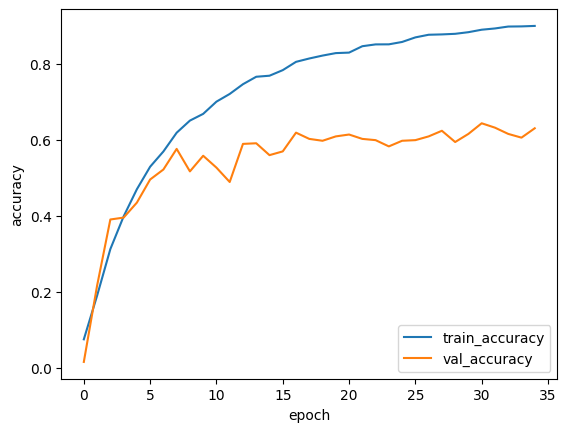

In [16]:
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(128, 128, 1)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.3), 

        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.3),

        tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.3), 

        tf.keras.layers.Conv2D(512, (3, 3), activation='relu'),  
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.3), 

        tf.keras.layers.Conv2D(1024, (3, 3), activation='relu'),  
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.3),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'), 
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.5),  

        tf.keras.layers.Dense(len(class_names), activation='softmax')
    ])
    return model

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=5000,
    decay_rate=0.95)

model = create_model()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(train_data, epochs=35, validation_data=val_data)

print_results()


Epoch 1/35


/opt/miniconda3/envs/ml/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-11-01 04:26:08.046450: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 8847 of 12120
2024-11-01 04:26:12.919962: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


    378/Unknown 95s 204ms/step - accuracy: 0.0256 - loss: 5.2045

/opt/miniconda3/envs/ml/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


378/378 ━━━━━━━━━━━━━━━━━━━━ 96s 207ms/step - accuracy: 0.0257 - loss: 5.2035 - val_accuracy: 0.0115 - val_loss: 10.0766
Epoch 2/35


2024-11-01 04:27:41.333844: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 8913 of 12120
2024-11-01 04:27:46.142779: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 94s 208ms/step - accuracy: 0.0862 - loss: 4.1945 - val_accuracy: 0.0099 - val_loss: 7.1171
Epoch 3/35


2024-11-01 04:29:15.093604: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 8983 of 12120
2024-11-01 04:29:19.779118: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 92s 204ms/step - accuracy: 0.1277 - loss: 3.8180 - val_accuracy: 0.0181 - val_loss: 6.0129
Epoch 4/35


2024-11-01 04:30:47.106279: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 9004 of 12120
2024-11-01 04:30:51.841239: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 93s 205ms/step - accuracy: 0.1730 - loss: 3.5721 - val_accuracy: 0.0395 - val_loss: 5.0402
Epoch 5/35


2024-11-01 04:32:19.644182: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 8989 of 12120
2024-11-01 04:32:24.324659: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 93s 206ms/step - accuracy: 0.2022 - loss: 3.3638 - val_accuracy: 0.0493 - val_loss: 4.7035
Epoch 6/35


2024-11-01 04:33:52.488731: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 9022 of 12120
2024-11-01 04:33:57.142184: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 94s 209ms/step - accuracy: 0.2477 - loss: 3.0968 - val_accuracy: 0.0411 - val_loss: 4.9869
Epoch 7/35


2024-11-01 04:35:26.507659: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 9005 of 12120
2024-11-01 04:35:31.147412: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 93s 208ms/step - accuracy: 0.2790 - loss: 2.9389 - val_accuracy: 0.1776 - val_loss: 3.8070
Epoch 8/35


2024-11-01 04:36:59.881468: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 8982 of 12120
2024-11-01 04:37:04.675305: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 94s 210ms/step - accuracy: 0.3193 - loss: 2.7772 - val_accuracy: 0.1891 - val_loss: 3.5930
Epoch 9/35


2024-11-01 04:38:24.279003: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-11-01 04:38:34.313433: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 9020 of 12120
2024-11-01 04:38:38.955584: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 93s 207ms/step - accuracy: 0.3434 - loss: 2.6283 - val_accuracy: 0.2451 - val_loss: 3.1233
Epoch 10/35


2024-11-01 04:40:07.433884: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 8967 of 12120
2024-11-01 04:40:12.119420: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 93s 206ms/step - accuracy: 0.3787 - loss: 2.5033 - val_accuracy: 0.2895 - val_loss: 2.9044
Epoch 11/35


2024-11-01 04:41:40.197776: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 9024 of 12120
2024-11-01 04:41:44.820006: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 95s 211ms/step - accuracy: 0.3962 - loss: 2.3984 - val_accuracy: 0.3306 - val_loss: 2.7441
Epoch 12/35


2024-11-01 04:43:14.755505: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 8994 of 12120
2024-11-01 04:43:19.409803: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 95s 212ms/step - accuracy: 0.4084 - loss: 2.3363 - val_accuracy: 0.3273 - val_loss: 2.6895
Epoch 13/35


2024-11-01 04:44:49.980860: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 8989 of 12120
2024-11-01 04:44:54.645950: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 93s 207ms/step - accuracy: 0.4327 - loss: 2.2204 - val_accuracy: 0.3717 - val_loss: 2.5791
Epoch 14/35


2024-11-01 04:46:23.226130: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 8973 of 12120
2024-11-01 04:46:27.912670: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 92s 205ms/step - accuracy: 0.4453 - loss: 2.1306 - val_accuracy: 0.3964 - val_loss: 2.3395
Epoch 15/35


2024-11-01 04:47:55.532382: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 9009 of 12120
2024-11-01 04:48:00.180075: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 94s 208ms/step - accuracy: 0.4759 - loss: 2.0537 - val_accuracy: 0.4326 - val_loss: 2.2180
Epoch 16/35


2024-11-01 04:49:29.168757: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 9031 of 12120
2024-11-01 04:49:33.792950: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 94s 208ms/step - accuracy: 0.4821 - loss: 2.0062 - val_accuracy: 0.4424 - val_loss: 2.1039
Epoch 17/35


2024-11-01 04:51:02.769271: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 8956 of 12120
2024-11-01 04:51:07.745345: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 94s 209ms/step - accuracy: 0.4863 - loss: 1.9486 - val_accuracy: 0.4375 - val_loss: 2.1571
Epoch 18/35


2024-11-01 04:52:36.911640: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 9016 of 12120
2024-11-01 04:52:41.545812: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 94s 209ms/step - accuracy: 0.4977 - loss: 1.9051 - val_accuracy: 0.4375 - val_loss: 2.1045
Epoch 19/35


2024-11-01 04:54:10.869141: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 8950 of 12120
2024-11-01 04:54:15.590945: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 93s 207ms/step - accuracy: 0.5160 - loss: 1.8149 - val_accuracy: 0.4753 - val_loss: 1.9778
Epoch 20/35


2024-11-01 04:55:44.138097: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 9014 of 12120
2024-11-01 04:55:48.742584: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 93s 208ms/step - accuracy: 0.5221 - loss: 1.7740 - val_accuracy: 0.4638 - val_loss: 2.1170
Epoch 21/35


2024-11-01 04:57:17.589923: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 9024 of 12120
2024-11-01 04:57:22.214403: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 94s 209ms/step - accuracy: 0.5446 - loss: 1.7096 - val_accuracy: 0.4556 - val_loss: 2.1363
Epoch 22/35


2024-11-01 04:58:51.453299: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 8988 of 12120
2024-11-01 04:58:56.128460: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 94s 209ms/step - accuracy: 0.5524 - loss: 1.6630 - val_accuracy: 0.4852 - val_loss: 2.0301
Epoch 23/35


2024-11-01 05:00:25.355032: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 8982 of 12120
2024-11-01 05:00:30.052612: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 94s 209ms/step - accuracy: 0.5504 - loss: 1.6639 - val_accuracy: 0.5033 - val_loss: 1.9058
Epoch 24/35


2024-11-01 05:01:59.246941: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 8889 of 12120
2024-11-01 05:02:04.094726: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 95s 211ms/step - accuracy: 0.5878 - loss: 1.5562 - val_accuracy: 0.4852 - val_loss: 1.9977
Epoch 25/35


2024-11-01 05:03:34.268079: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 8985 of 12120
2024-11-01 05:03:38.941912: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 93s 206ms/step - accuracy: 0.5879 - loss: 1.5460 - val_accuracy: 0.4293 - val_loss: 2.4538
Epoch 26/35


2024-11-01 05:05:07.145708: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 8949 of 12120
2024-11-01 05:05:11.853993: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 92s 205ms/step - accuracy: 0.5950 - loss: 1.4804 - val_accuracy: 0.4934 - val_loss: 1.9415
Epoch 27/35


2024-11-01 05:06:39.487220: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 9023 of 12120
2024-11-01 05:06:44.084649: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 93s 207ms/step - accuracy: 0.6072 - loss: 1.4458 - val_accuracy: 0.5115 - val_loss: 1.8890
Epoch 28/35


2024-11-01 05:08:12.588390: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 8959 of 12120
2024-11-01 05:08:17.290496: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 93s 207ms/step - accuracy: 0.6116 - loss: 1.4046 - val_accuracy: 0.4803 - val_loss: 2.0019
Epoch 29/35


2024-11-01 05:09:45.851245: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 9005 of 12120
2024-11-01 05:09:50.513212: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 93s 206ms/step - accuracy: 0.6192 - loss: 1.4310 - val_accuracy: 0.5082 - val_loss: 1.8556
Epoch 30/35


2024-11-01 05:11:18.511327: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 9007 of 12120
2024-11-01 05:11:23.145226: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 94s 209ms/step - accuracy: 0.6234 - loss: 1.3935 - val_accuracy: 0.4852 - val_loss: 2.1332
Epoch 31/35


2024-11-01 05:12:52.226703: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 9041 of 12120
2024-11-01 05:12:56.834570: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 92s 205ms/step - accuracy: 0.6435 - loss: 1.3190 - val_accuracy: 0.5197 - val_loss: 1.8565
Epoch 32/35


2024-11-01 05:14:24.558932: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 9016 of 12120
2024-11-01 05:14:29.232744: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 93s 207ms/step - accuracy: 0.6161 - loss: 1.3818 - val_accuracy: 0.5493 - val_loss: 1.6823
Epoch 33/35


2024-11-01 05:15:57.645612: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 9030 of 12120
2024-11-01 05:16:02.270073: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 94s 210ms/step - accuracy: 0.6307 - loss: 1.3142 - val_accuracy: 0.5247 - val_loss: 1.8030
Epoch 34/35


2024-11-01 05:17:31.912406: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 9009 of 12120
2024-11-01 05:17:36.563198: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 94s 208ms/step - accuracy: 0.6522 - loss: 1.2581 - val_accuracy: 0.5510 - val_loss: 1.6855
Epoch 35/35


2024-11-01 05:19:05.646904: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 8955 of 12120
2024-11-01 05:19:10.371735: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 92s 205ms/step - accuracy: 0.6380 - loss: 1.3025 - val_accuracy: 0.5691 - val_loss: 1.6419
176/176 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step
accuracy: 66.87%

precision, recall, F1 score for each class:
accordion: Precision=0.85, Recall=0.68, F1 Score=0.76
airplanes: Precision=0.99, Recall=0.76, F1 Score=0.86
anchor: Precision=0.30, Recall=0.50, F1 Score=0.38
ant: Precision=0.00, Recall=0.00, F1 Score=0.00
barrel: Precision=0.24, Recall=0.59, F1 Score=0.34
bass: Precision=0.31, Recall=0.17, F1 Score=0.22
beaver: Precision=0.08, Recall=0.31, F1 Score=0.13
binocular: Precision=0.50, Recall=0.33, F1 Score=0.40
bonsai: Precision=0.70, Recall=0.53, F1 Score=0.60
brain: Precision=0.72, Recall=0.32, F1 Score=0.44
brontosaurus: Precision=0.33, Recall=0.38, F1 Score=0.36
buddha: Precision=0.74, Recall=0.64, F1 Score=0.69
butterfly: Precision=0.82, Recall=0.38, F1 Score=0.52
camera: Precision=0.77, Recall=0.50, F1 Score=0.61
cannon: Precision=0.12, Recall=0.25, F1 Score=0.16

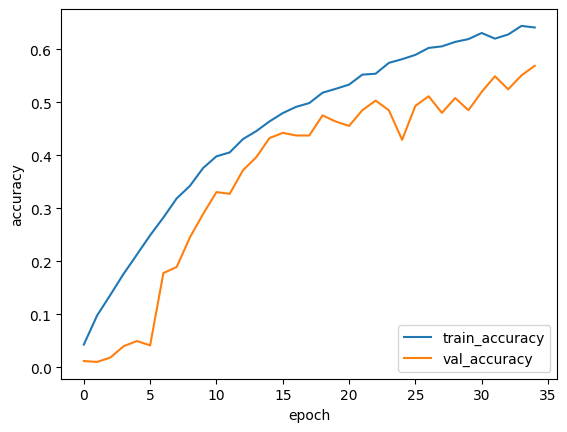

In [17]:
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.5), 

        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.5),

        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.5), 

        tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),  
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.5), 

        tf.keras.layers.Conv2D(512, (3, 3), activation='relu'),  
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.5),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'), 
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.5),  

        tf.keras.layers.Dense(len(class_names), activation='softmax')
    ])
    return model

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=5000,
    decay_rate=0.95)

model = create_model()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(train_data, epochs=35, validation_data=val_data)

print_results()


### seems like that didn't help...

### let's finally test with a static learning rate but more epochs

Epoch 1/50


/opt/miniconda3/envs/ml/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-11-01 05:20:49.422869: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 9024 of 12120
2024-11-01 05:20:54.081137: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


    378/Unknown 89s 189ms/step - accuracy: 0.0511 - loss: 4.7636

/opt/miniconda3/envs/ml/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


378/378 ━━━━━━━━━━━━━━━━━━━━ 90s 191ms/step - accuracy: 0.0512 - loss: 4.7626 - val_accuracy: 0.0148 - val_loss: 7.3364
Epoch 2/50


2024-11-01 05:22:16.450144: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 9013 of 12120
2024-11-01 05:22:21.078071: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 86s 188ms/step - accuracy: 0.1820 - loss: 3.6319 - val_accuracy: 0.1924 - val_loss: 3.5704
Epoch 3/50


2024-11-01 05:23:42.405493: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 8998 of 12120
2024-11-01 05:23:47.058411: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 86s 187ms/step - accuracy: 0.2825 - loss: 3.0676 - val_accuracy: 0.2862 - val_loss: 3.1043
Epoch 4/50


2024-11-01 05:25:08.091750: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 8825 of 12120
2024-11-01 05:25:13.021491: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 89s 196ms/step - accuracy: 0.3430 - loss: 2.6912 - val_accuracy: 0.4359 - val_loss: 2.1894
Epoch 5/50


2024-11-01 05:26:37.526603: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 9007 of 12120
2024-11-01 05:26:42.149321: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 89s 195ms/step - accuracy: 0.4000 - loss: 2.4427 - val_accuracy: 0.3898 - val_loss: 2.3511
Epoch 6/50


2024-11-01 05:28:06.119542: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 8972 of 12120
2024-11-01 05:28:10.827205: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 88s 194ms/step - accuracy: 0.4545 - loss: 2.1858 - val_accuracy: 0.4803 - val_loss: 2.0840
Epoch 7/50


2024-11-01 05:29:34.609450: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 9014 of 12120
2024-11-01 05:29:39.279180: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 90s 199ms/step - accuracy: 0.5003 - loss: 2.0248 - val_accuracy: 0.4770 - val_loss: 2.1569
Epoch 8/50


2024-11-01 05:31:04.639168: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 8974 of 12120
2024-11-01 05:31:09.319918: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 88s 194ms/step - accuracy: 0.5155 - loss: 1.8850 - val_accuracy: 0.5148 - val_loss: 1.8303
Epoch 9/50


2024-11-01 05:32:32.821255: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 9009 of 12120
2024-11-01 05:32:37.460614: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 90s 198ms/step - accuracy: 0.5674 - loss: 1.6810 - val_accuracy: 0.5296 - val_loss: 1.7692
Epoch 10/50


2024-11-01 05:34:02.658659: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 9011 of 12120
2024-11-01 05:34:07.415438: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 86s 189ms/step - accuracy: 0.5953 - loss: 1.5785 - val_accuracy: 0.5263 - val_loss: 1.7818
Epoch 11/50


2024-11-01 05:35:29.080348: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 8975 of 12120
2024-11-01 05:35:33.786418: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 90s 198ms/step - accuracy: 0.6169 - loss: 1.4733 - val_accuracy: 0.4918 - val_loss: 2.0872
Epoch 12/50


2024-11-01 05:36:58.914162: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 9020 of 12120
2024-11-01 05:37:03.517446: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 89s 196ms/step - accuracy: 0.6450 - loss: 1.3732 - val_accuracy: 0.5609 - val_loss: 1.6640
Epoch 13/50


2024-11-01 05:38:27.908700: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 9015 of 12120
2024-11-01 05:38:32.512993: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 86s 189ms/step - accuracy: 0.6716 - loss: 1.2622 - val_accuracy: 0.5576 - val_loss: 1.7069
Epoch 14/50


2024-11-01 05:39:54.322893: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 8872 of 12120
2024-11-01 05:39:59.151400: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 90s 198ms/step - accuracy: 0.6686 - loss: 1.2563 - val_accuracy: 0.5312 - val_loss: 1.7032
Epoch 15/50


2024-11-01 05:41:24.320601: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 8992 of 12120
2024-11-01 05:41:28.976668: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 90s 198ms/step - accuracy: 0.6934 - loss: 1.1555 - val_accuracy: 0.5378 - val_loss: 1.8152
Epoch 16/50


2024-11-01 05:42:53.935797: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 8981 of 12120
2024-11-01 05:42:58.607003: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 89s 195ms/step - accuracy: 0.7059 - loss: 1.1186 - val_accuracy: 0.5757 - val_loss: 1.6541
Epoch 17/50


2024-11-01 05:44:22.524153: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 9008 of 12120
2024-11-01 05:44:27.138142: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 88s 194ms/step - accuracy: 0.7080 - loss: 1.0879 - val_accuracy: 0.5822 - val_loss: 1.6985
Epoch 18/50


2024-11-01 05:45:50.583014: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 8952 of 12120
2024-11-01 05:45:55.308653: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 86s 188ms/step - accuracy: 0.7375 - loss: 0.9771 - val_accuracy: 0.5970 - val_loss: 1.5360
Epoch 19/50


2024-11-01 05:47:16.506321: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 8929 of 12120
2024-11-01 05:47:21.306586: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 88s 192ms/step - accuracy: 0.7289 - loss: 0.9872 - val_accuracy: 0.5461 - val_loss: 1.7273
Epoch 20/50


2024-11-01 05:48:44.018430: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 8994 of 12120
2024-11-01 05:48:48.725344: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 89s 197ms/step - accuracy: 0.7403 - loss: 0.9399 - val_accuracy: 0.5757 - val_loss: 1.5468
Epoch 21/50


2024-11-01 05:50:13.484808: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 8991 of 12120
2024-11-01 05:50:18.169759: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 87s 190ms/step - accuracy: 0.7733 - loss: 0.8400 - val_accuracy: 0.5641 - val_loss: 1.6587
Epoch 22/50


2024-11-01 05:51:40.118873: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 9014 of 12120
2024-11-01 05:51:44.737022: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 86s 189ms/step - accuracy: 0.7717 - loss: 0.8533 - val_accuracy: 0.5822 - val_loss: 1.6236
Epoch 23/50


2024-11-01 05:53:06.239462: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 8930 of 12120
2024-11-01 05:53:10.998014: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 87s 190ms/step - accuracy: 0.7659 - loss: 0.8497 - val_accuracy: 0.5921 - val_loss: 1.4997
Epoch 24/50


2024-11-01 05:54:33.204846: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 9001 of 12120
2024-11-01 05:54:37.837569: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 87s 192ms/step - accuracy: 0.7798 - loss: 0.8180 - val_accuracy: 0.5789 - val_loss: 1.7162
Epoch 25/50


2024-11-01 05:56:00.680490: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 9002 of 12120
2024-11-01 05:56:05.449699: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 89s 196ms/step - accuracy: 0.7748 - loss: 0.8194 - val_accuracy: 0.5625 - val_loss: 1.8641
Epoch 26/50


2024-11-01 05:57:29.773964: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 9006 of 12120
2024-11-01 05:57:34.487137: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 87s 189ms/step - accuracy: 0.7887 - loss: 0.7630 - val_accuracy: 0.5757 - val_loss: 1.5415
Epoch 27/50


2024-11-01 05:58:56.332804: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 8975 of 12120
2024-11-01 05:59:01.022745: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 89s 197ms/step - accuracy: 0.7933 - loss: 0.7371 - val_accuracy: 0.5822 - val_loss: 1.6634
Epoch 28/50


2024-11-01 06:00:25.613641: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 9029 of 12120
2024-11-01 06:00:30.231478: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 89s 195ms/step - accuracy: 0.8099 - loss: 0.6983 - val_accuracy: 0.6118 - val_loss: 1.5729
Epoch 29/50


2024-11-01 06:01:54.219134: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 8980 of 12120
2024-11-01 06:01:58.894894: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 89s 197ms/step - accuracy: 0.7991 - loss: 0.7297 - val_accuracy: 0.5970 - val_loss: 1.5605
Epoch 30/50


2024-11-01 06:03:23.614767: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 8995 of 12120
2024-11-01 06:03:28.259153: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 86s 189ms/step - accuracy: 0.8168 - loss: 0.6463 - val_accuracy: 0.5625 - val_loss: 1.6206
Epoch 31/50


2024-11-01 06:04:50.063582: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 9001 of 12120
2024-11-01 06:04:54.736226: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 90s 199ms/step - accuracy: 0.8176 - loss: 0.6560 - val_accuracy: 0.6102 - val_loss: 1.5716
Epoch 32/50


2024-11-01 06:06:20.140391: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 8866 of 12120
2024-11-01 06:06:24.967505: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 86s 188ms/step - accuracy: 0.8170 - loss: 0.6456 - val_accuracy: 0.5872 - val_loss: 1.7334
Epoch 33/50


2024-11-01 06:07:46.115652: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 9004 of 12120
2024-11-01 06:07:50.772272: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 87s 191ms/step - accuracy: 0.8241 - loss: 0.6254 - val_accuracy: 0.5872 - val_loss: 1.8020
Epoch 34/50


2024-11-01 06:09:13.327468: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 8925 of 12120
2024-11-01 06:09:18.087505: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 89s 196ms/step - accuracy: 0.8257 - loss: 0.6173 - val_accuracy: 0.5905 - val_loss: 1.6382
Epoch 35/50


2024-11-01 06:10:42.338030: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 8927 of 12120
2024-11-01 06:10:47.105729: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 87s 191ms/step - accuracy: 0.8320 - loss: 0.5848 - val_accuracy: 0.5740 - val_loss: 1.6578
Epoch 36/50


2024-11-01 06:12:09.557420: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 8873 of 12120
2024-11-01 06:12:14.404715: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 89s 197ms/step - accuracy: 0.8398 - loss: 0.5749 - val_accuracy: 0.5592 - val_loss: 1.7450
Epoch 37/50


2024-11-01 06:13:38.968300: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 9011 of 12120
2024-11-01 06:13:43.625567: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 88s 193ms/step - accuracy: 0.8380 - loss: 0.5671 - val_accuracy: 0.6036 - val_loss: 1.6184
Epoch 38/50


2024-11-01 06:15:06.933473: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 8929 of 12120
2024-11-01 06:15:11.773710: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 86s 186ms/step - accuracy: 0.8322 - loss: 0.5774 - val_accuracy: 0.5970 - val_loss: 1.6932
Epoch 39/50


2024-11-01 06:16:32.445597: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 9028 of 12120
2024-11-01 06:16:37.065024: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 88s 194ms/step - accuracy: 0.8483 - loss: 0.5313 - val_accuracy: 0.5921 - val_loss: 1.6360
Epoch 40/50


2024-11-01 06:18:00.434039: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 9002 of 12120
2024-11-01 06:18:05.133618: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 85s 185ms/step - accuracy: 0.8409 - loss: 0.5581 - val_accuracy: 0.5641 - val_loss: 1.7159
Epoch 41/50


2024-11-01 06:19:25.407037: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 8989 of 12120
2024-11-01 06:19:30.156332: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 90s 198ms/step - accuracy: 0.8494 - loss: 0.5367 - val_accuracy: 0.6135 - val_loss: 1.4951
Epoch 42/50


2024-11-01 06:20:55.032583: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 8995 of 12120
2024-11-01 06:20:59.670079: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 90s 198ms/step - accuracy: 0.8490 - loss: 0.5389 - val_accuracy: 0.5921 - val_loss: 1.6536
Epoch 43/50


2024-11-01 06:22:24.943416: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 9004 of 12120
2024-11-01 06:22:29.578581: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 89s 197ms/step - accuracy: 0.8596 - loss: 0.4889 - val_accuracy: 0.5641 - val_loss: 1.8141
Epoch 44/50


2024-11-01 06:23:54.337736: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 8973 of 12120
2024-11-01 06:23:59.034249: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 89s 195ms/step - accuracy: 0.8596 - loss: 0.4843 - val_accuracy: 0.5938 - val_loss: 1.7738
Epoch 45/50


2024-11-01 06:25:22.859457: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 9019 of 12120
2024-11-01 06:25:27.475672: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 89s 196ms/step - accuracy: 0.8568 - loss: 0.4973 - val_accuracy: 0.5872 - val_loss: 1.8855
Epoch 46/50


2024-11-01 06:26:51.843094: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 9026 of 12120
2024-11-01 06:26:56.461638: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 86s 188ms/step - accuracy: 0.8670 - loss: 0.4645 - val_accuracy: 0.6036 - val_loss: 1.6353
Epoch 47/50


2024-11-01 06:28:17.664595: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 9011 of 12120
2024-11-01 06:28:22.298458: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 89s 195ms/step - accuracy: 0.8627 - loss: 0.4653 - val_accuracy: 0.5839 - val_loss: 1.7298
Epoch 48/50


2024-11-01 06:29:46.179558: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 9013 of 12120
2024-11-01 06:29:50.801893: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 90s 198ms/step - accuracy: 0.8653 - loss: 0.4711 - val_accuracy: 0.5822 - val_loss: 1.7682
Epoch 49/50


2024-11-01 06:31:15.821649: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 8970 of 12120
2024-11-01 06:31:20.517632: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 88s 194ms/step - accuracy: 0.8706 - loss: 0.4464 - val_accuracy: 0.5872 - val_loss: 1.8163
Epoch 50/50


2024-11-01 06:32:44.072084: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 9011 of 12120
2024-11-01 06:32:48.751713: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 89s 197ms/step - accuracy: 0.8688 - loss: 0.4533 - val_accuracy: 0.5658 - val_loss: 1.8953
176/176 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step
accuracy: 70.15%

precision, recall, F1 score for each class:
accordion: Precision=0.67, Recall=0.80, F1 Score=0.73
airplanes: Precision=0.99, Recall=0.79, F1 Score=0.88
anchor: Precision=0.56, Recall=0.42, F1 Score=0.48
ant: Precision=0.13, Recall=0.17, F1 Score=0.15
barrel: Precision=0.27, Recall=0.35, F1 Score=0.31
bass: Precision=1.00, Recall=0.08, F1 Score=0.15
beaver: Precision=0.16, Recall=0.44, F1 Score=0.24
binocular: Precision=0.12, Recall=0.33, F1 Score=0.18
bonsai: Precision=0.70, Recall=0.59, F1 Score=0.64
brain: Precision=0.84, Recall=0.47, F1 Score=0.60
brontosaurus: Precision=0.23, Recall=0.62, F1 Score=0.33
buddha: Precision=0.87, Recall=0.49, F1 Score=0.63
butterfly: Precision=0.64, Recall=0.42, F1 Score=0.51
camera: Precision=0.71, Recall=0.60, F1 Score=0.65
cannon: Precision=0.27, Recall=0.25, F1 Score=0.26

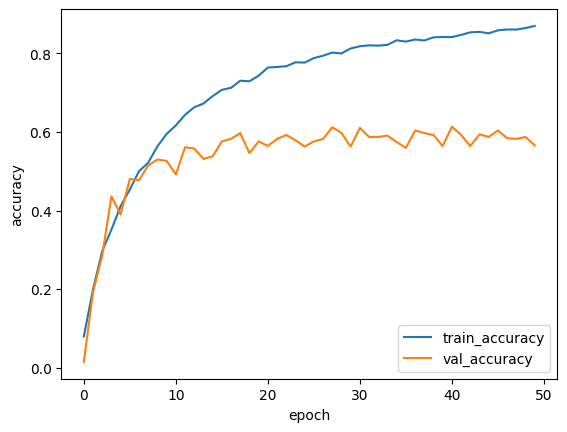

In [18]:
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.25),

        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.25),

        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.25),

        tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),  
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.25),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'),  
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.5),

        tf.keras.layers.Dense(len(class_names), activation='softmax')
    ])
    return model

model = create_model()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(train_data, epochs=50, validation_data=val_data)

print_results()


Epoch 1/50


/opt/miniconda3/envs/ml/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-11-01 06:34:25.114365: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 9061 of 12120
2024-11-01 06:34:29.645046: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


    378/Unknown 190s 459ms/step - accuracy: 0.0739 - loss: 4.5573

/opt/miniconda3/envs/ml/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


378/378 ━━━━━━━━━━━━━━━━━━━━ 192s 464ms/step - accuracy: 0.0740 - loss: 4.5561 - val_accuracy: 0.0148 - val_loss: 6.3614
Epoch 2/50


2024-11-01 06:37:35.003348: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 9025 of 12120
2024-11-01 06:37:39.684573: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 188s 459ms/step - accuracy: 0.2310 - loss: 3.3235 - val_accuracy: 0.3799 - val_loss: 2.4223
Epoch 3/50


2024-11-01 06:40:43.459576: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 9026 of 12120
2024-11-01 06:40:48.138971: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 189s 461ms/step - accuracy: 0.3124 - loss: 2.8453 - val_accuracy: 0.1678 - val_loss: 5.9941
Epoch 4/50


2024-11-01 06:43:52.693605: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 9033 of 12120
2024-11-01 06:43:57.310930: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 189s 460ms/step - accuracy: 0.3475 - loss: 2.7257 - val_accuracy: 0.4770 - val_loss: 2.0360
Epoch 5/50


2024-11-01 06:47:01.635458: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 8988 of 12120
2024-11-01 06:47:06.405574: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 190s 463ms/step - accuracy: 0.3937 - loss: 2.4547 - val_accuracy: 0.4671 - val_loss: 2.1274
Epoch 6/50


2024-11-01 06:50:11.974933: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 8987 of 12120
2024-11-01 06:50:16.658195: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 191s 466ms/step - accuracy: 0.4773 - loss: 2.0537 - val_accuracy: 0.4984 - val_loss: 1.9359
Epoch 7/50


2024-11-01 06:53:23.040236: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 9011 of 12120
2024-11-01 06:53:27.678632: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 190s 463ms/step - accuracy: 0.5169 - loss: 1.8815 - val_accuracy: 0.4836 - val_loss: 1.8931
Epoch 8/50


2024-11-01 06:56:32.829115: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 8999 of 12120
2024-11-01 06:56:37.505519: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 190s 463ms/step - accuracy: 0.5335 - loss: 1.7812 - val_accuracy: 0.5164 - val_loss: 1.7588
Epoch 9/50


2024-11-01 06:59:42.626630: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 9005 of 12120
2024-11-01 06:59:47.450967: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 190s 464ms/step - accuracy: 0.5661 - loss: 1.6763 - val_accuracy: 0.5148 - val_loss: 1.7975
Epoch 10/50


2024-11-01 07:02:52.961501: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 8944 of 12120
2024-11-01 07:02:57.725353: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 189s 460ms/step - accuracy: 0.5999 - loss: 1.5366 - val_accuracy: 0.5148 - val_loss: 1.7929
Epoch 11/50


2024-11-01 07:06:02.011783: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 8992 of 12120
2024-11-01 07:06:06.754841: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 190s 463ms/step - accuracy: 0.6163 - loss: 1.4324 - val_accuracy: 0.5296 - val_loss: 1.8018
Epoch 12/50


2024-11-01 07:09:11.922621: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 8941 of 12120
2024-11-01 07:09:16.676623: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 189s 460ms/step - accuracy: 0.6303 - loss: 1.3775 - val_accuracy: 0.5247 - val_loss: 1.7933
Epoch 13/50


2024-11-01 07:12:20.974860: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 9023 of 12120
2024-11-01 07:12:25.662942: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 190s 462ms/step - accuracy: 0.6578 - loss: 1.2663 - val_accuracy: 0.5493 - val_loss: 1.7177
Epoch 14/50


2024-11-01 07:15:30.528234: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 9010 of 12120
2024-11-01 07:15:35.205186: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 189s 460ms/step - accuracy: 0.6834 - loss: 1.1793 - val_accuracy: 0.5395 - val_loss: 1.7796
Epoch 15/50


2024-11-01 07:18:39.269600: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 8956 of 12120
2024-11-01 07:18:44.003061: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 190s 464ms/step - accuracy: 0.6946 - loss: 1.1229 - val_accuracy: 0.5559 - val_loss: 1.6817
Epoch 16/50


2024-11-01 07:21:49.710985: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 9010 of 12120
2024-11-01 07:21:54.429643: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 191s 465ms/step - accuracy: 0.7045 - loss: 1.1064 - val_accuracy: 0.5510 - val_loss: 1.6520
Epoch 17/50


2024-11-01 07:25:00.479165: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 9026 of 12120
2024-11-01 07:25:05.244579: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 191s 465ms/step - accuracy: 0.7196 - loss: 1.0270 - val_accuracy: 0.5181 - val_loss: 1.9114
Epoch 18/50


2024-11-01 07:28:11.546059: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 8945 of 12120
2024-11-01 07:28:16.287295: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 189s 461ms/step - accuracy: 0.7237 - loss: 1.0088 - val_accuracy: 0.5641 - val_loss: 1.6516
Epoch 19/50


2024-11-01 07:31:20.780749: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 8996 of 12120
2024-11-01 07:31:25.409797: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 190s 464ms/step - accuracy: 0.7399 - loss: 0.9499 - val_accuracy: 0.5658 - val_loss: 1.6502
Epoch 20/50


2024-11-01 07:34:31.256838: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 8945 of 12120
2024-11-01 07:34:36.018262: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 189s 460ms/step - accuracy: 0.7462 - loss: 0.9077 - val_accuracy: 0.5576 - val_loss: 1.7441
Epoch 21/50


2024-11-01 07:37:40.164030: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 9019 of 12120
2024-11-01 07:37:44.851340: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 190s 464ms/step - accuracy: 0.7507 - loss: 0.8825 - val_accuracy: 0.5609 - val_loss: 1.7814
Epoch 22/50


2024-11-01 07:40:50.565597: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 8988 of 12120
2024-11-01 07:40:55.293661: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 191s 465ms/step - accuracy: 0.7601 - loss: 0.8505 - val_accuracy: 0.5641 - val_loss: 1.8411
Epoch 23/50


2024-11-01 07:44:01.465180: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 8984 of 12120
2024-11-01 07:44:06.172134: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 189s 461ms/step - accuracy: 0.7733 - loss: 0.8118 - val_accuracy: 0.5674 - val_loss: 1.8237
Epoch 24/50


2024-11-01 07:47:10.916707: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 8912 of 12120
2024-11-01 07:47:15.718024: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 190s 463ms/step - accuracy: 0.7812 - loss: 0.7575 - val_accuracy: 0.6036 - val_loss: 1.6250
Epoch 25/50


2024-11-01 07:50:21.215220: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 8868 of 12120
2024-11-01 07:50:26.061165: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 190s 462ms/step - accuracy: 0.7921 - loss: 0.7532 - val_accuracy: 0.5625 - val_loss: 1.8037
Epoch 26/50


2024-11-01 07:53:30.926561: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 9009 of 12120
2024-11-01 07:53:35.631879: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 190s 463ms/step - accuracy: 0.7980 - loss: 0.7314 - val_accuracy: 0.5707 - val_loss: 1.8323
Epoch 27/50


2024-11-01 07:56:40.790301: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 9015 of 12120
2024-11-01 07:56:45.412093: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 189s 461ms/step - accuracy: 0.8068 - loss: 0.6817 - val_accuracy: 0.5789 - val_loss: 1.6918
Epoch 28/50


2024-11-01 07:59:50.010700: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 9011 of 12120
2024-11-01 07:59:54.683364: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 189s 461ms/step - accuracy: 0.8037 - loss: 0.6919 - val_accuracy: 0.5855 - val_loss: 1.7475
Epoch 29/50


2024-11-01 08:02:59.017735: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 8963 of 12120
2024-11-01 08:03:03.713942: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 188s 457ms/step - accuracy: 0.8093 - loss: 0.6668 - val_accuracy: 0.5855 - val_loss: 1.6953
Epoch 30/50


2024-11-01 08:06:07.071381: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 9020 of 12120
2024-11-01 08:06:12.182553: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 252s 625ms/step - accuracy: 0.8212 - loss: 0.6252 - val_accuracy: 0.5839 - val_loss: 1.8177
Epoch 31/50


2024-11-01 08:10:19.168308: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 6187 of 12120
2024-11-01 08:10:29.167522: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 10185 of 12120
2024-11-01 08:10:33.893700: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 332s 811ms/step - accuracy: 0.8250 - loss: 0.6188 - val_accuracy: 0.5576 - val_loss: 1.9102
Epoch 32/50


2024-11-01 08:15:50.694311: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 6469 of 12120
2024-11-01 08:16:00.696084: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 10545 of 12120
2024-11-01 08:16:04.588516: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 322s 789ms/step - accuracy: 0.8236 - loss: 0.6246 - val_accuracy: 0.5954 - val_loss: 1.7161
Epoch 33/50


2024-11-01 08:21:13.153686: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 6243 of 12120
2024-11-01 08:21:27.999286: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 323s 788ms/step - accuracy: 0.8212 - loss: 0.6136 - val_accuracy: 0.5839 - val_loss: 1.8001
Epoch 34/50


2024-11-01 08:26:36.261317: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 6323 of 12120
2024-11-01 08:26:46.262357: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 10450 of 12120
2024-11-01 08:26:50.668519: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 327s 799ms/step - accuracy: 0.8368 - loss: 0.5664 - val_accuracy: 0.6020 - val_loss: 1.7278
Epoch 35/50


2024-11-01 08:32:02.822056: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 6159 of 12120
2024-11-01 08:32:12.826358: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 10060 of 12120
2024-11-01 08:32:17.775578: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 325s 794ms/step - accuracy: 0.8379 - loss: 0.5624 - val_accuracy: 0.5970 - val_loss: 1.6588
Epoch 36/50


2024-11-01 08:37:28.195597: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 6366 of 12120
2024-11-01 08:37:42.505916: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 238s 563ms/step - accuracy: 0.8440 - loss: 0.5325 - val_accuracy: 0.5987 - val_loss: 1.6023
Epoch 37/50


2024-11-01 08:41:26.024283: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 8898 of 12120
2024-11-01 08:41:30.868068: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 188s 457ms/step - accuracy: 0.8404 - loss: 0.5511 - val_accuracy: 0.6168 - val_loss: 1.6230
Epoch 38/50


2024-11-01 08:44:33.985851: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 8992 of 12120
2024-11-01 08:44:38.694520: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 189s 460ms/step - accuracy: 0.8559 - loss: 0.4922 - val_accuracy: 0.6020 - val_loss: 1.7105
Epoch 39/50


2024-11-01 08:47:42.768904: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 9003 of 12120
2024-11-01 08:47:47.545745: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 195s 477ms/step - accuracy: 0.8610 - loss: 0.4932 - val_accuracy: 0.6036 - val_loss: 1.6739
Epoch 40/50


2024-11-01 08:50:57.865710: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 8940 of 12120
2024-11-01 08:51:02.632902: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 193s 471ms/step - accuracy: 0.8608 - loss: 0.4860 - val_accuracy: 0.5411 - val_loss: 2.0757
Epoch 41/50


2024-11-01 08:54:10.735451: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 8913 of 12120
2024-11-01 08:54:15.578811: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 193s 471ms/step - accuracy: 0.8618 - loss: 0.4712 - val_accuracy: 0.6003 - val_loss: 1.7232
Epoch 42/50


2024-11-01 08:57:23.999383: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 8912 of 12120
2024-11-01 08:57:28.823256: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 193s 471ms/step - accuracy: 0.8587 - loss: 0.4949 - val_accuracy: 0.5855 - val_loss: 1.8509
Epoch 43/50


2024-11-01 09:00:37.282880: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 8937 of 12120
2024-11-01 09:00:42.155528: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 192s 468ms/step - accuracy: 0.8644 - loss: 0.4695 - val_accuracy: 0.6184 - val_loss: 1.6508
Epoch 44/50


2024-11-01 09:03:49.342614: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 8953 of 12120
2024-11-01 09:03:54.095623: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 193s 469ms/step - accuracy: 0.8657 - loss: 0.4587 - val_accuracy: 0.6053 - val_loss: 1.7308
Epoch 45/50


2024-11-01 09:07:01.853273: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 8950 of 12120
2024-11-01 09:07:06.689245: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 192s 468ms/step - accuracy: 0.8669 - loss: 0.4677 - val_accuracy: 0.5674 - val_loss: 1.8801
Epoch 46/50


2024-11-01 09:10:13.859463: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 8922 of 12120
2024-11-01 09:10:18.653800: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 193s 472ms/step - accuracy: 0.8687 - loss: 0.4460 - val_accuracy: 0.5987 - val_loss: 1.6490
Epoch 47/50


2024-11-01 09:13:27.254930: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 8921 of 12120
2024-11-01 09:13:32.096027: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 193s 470ms/step - accuracy: 0.8738 - loss: 0.4174 - val_accuracy: 0.6003 - val_loss: 1.6961
Epoch 48/50


2024-11-01 09:16:40.118227: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 8957 of 12120
2024-11-01 09:16:44.870824: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 196s 478ms/step - accuracy: 0.8755 - loss: 0.4268 - val_accuracy: 0.6118 - val_loss: 1.7008
Epoch 49/50


2024-11-01 09:19:55.885276: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 8948 of 12120
2024-11-01 09:20:00.700956: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 193s 470ms/step - accuracy: 0.8712 - loss: 0.4338 - val_accuracy: 0.6053 - val_loss: 1.8750
Epoch 50/50


2024-11-01 09:23:08.670575: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:85: Filling up shuffle buffer (this may take a while): 8904 of 12120
2024-11-01 09:23:13.514470: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


378/378 ━━━━━━━━━━━━━━━━━━━━ 192s 468ms/step - accuracy: 0.8762 - loss: 0.4072 - val_accuracy: 0.6151 - val_loss: 1.6505


2024-11-01 09:26:10.768736: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


176/176 ━━━━━━━━━━━━━━━━━━━━ 16s 89ms/step
accuracy: 73.28%

precision, recall, F1 score for each class:
accordion: Precision=0.62, Recall=0.80, F1 Score=0.70
airplanes: Precision=1.00, Recall=0.82, F1 Score=0.90
anchor: Precision=0.37, Recall=0.58, F1 Score=0.45
ant: Precision=0.22, Recall=0.17, F1 Score=0.19
barrel: Precision=0.28, Recall=0.59, F1 Score=0.38
bass: Precision=0.37, Recall=0.42, F1 Score=0.39
beaver: Precision=0.12, Recall=0.25, F1 Score=0.17
binocular: Precision=0.07, Recall=0.33, F1 Score=0.12
bonsai: Precision=0.88, Recall=0.58, F1 Score=0.70
brain: Precision=0.52, Recall=0.61, F1 Score=0.56
brontosaurus: Precision=0.41, Recall=0.54, F1 Score=0.47
buddha: Precision=0.78, Recall=0.73, F1 Score=0.75
butterfly: Precision=0.56, Recall=0.52, F1 Score=0.54
camera: Precision=0.57, Recall=0.60, F1 Score=0.59
cannon: Precision=0.19, Recall=0.25, F1 Score=0.21
car_side: Precision=0.79, Recall=0.92, F1 Score=0.85
ceiling_fan: Precision=0.58, Recall=0.88, F1 Score=0.70
cellphone

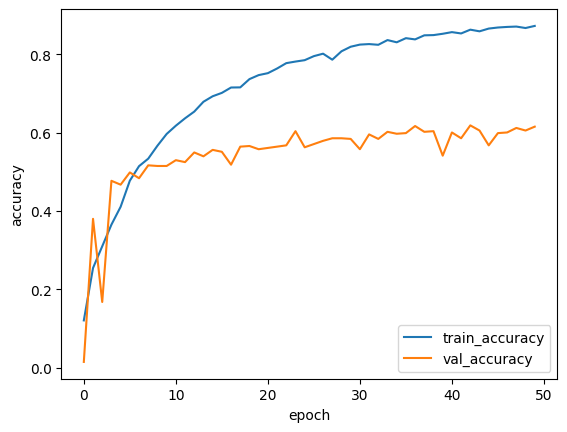

In [19]:
# Model architecture
model = tf.keras.models.Sequential([
    # First convolutional block
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),

    # Second convolutional block
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.3),

    # Third convolutional block
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.4),

    # Flatten and Dense layers
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(class_names), activation='softmax')  # Output layer for 101 classes
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(train_data, epochs=50, validation_data=val_data)

print_results()